In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#Relevant packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.datasets import make_classification

In [10]:
pd.options.display.max_columns = None

In [11]:
# Load the dataset
dataset = pd.read_excel("/content/drive/MyDrive/Alziemer_Diseases_detection/data.xlsx")

In [ ]:
dataset.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,1,0,0,0,168,62,280.712539,198.334629,79.080503,263.943655,27.517529,5.510144,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,0,0,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175,1.964413,6.062124,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,0,0,0,0,0,0,117,63,151.383137,69.623510,77.346816,210.570866,10.139568,3.401374,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,0,0,0,0,0,1,117,119,233.605755,144.045740,43.075893,151.164186,25.820732,7.396061,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,0,1,0,0,0,0,130,78,281.630050,130.497580,74.291247,144.175975,28.388409,1.148904,0,1,4.554394,0,0,0,0,0,0,XXXConfid


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
dataset.Diagnosis.value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [ ]:
# Check for unique values.
dataset.nunique()

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation

In [ ]:
dataset.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [ ]:
dataset.shape

(2149, 35)

In [ ]:
dataset.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

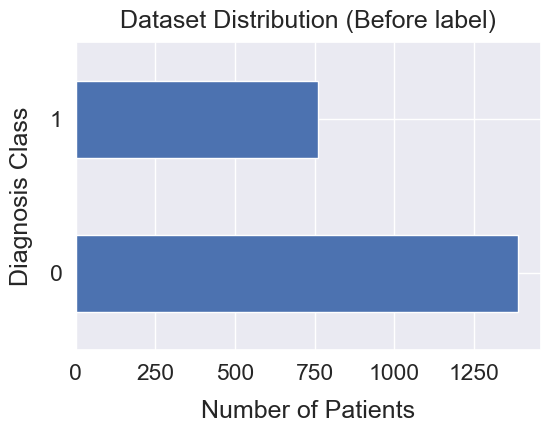

In [ ]:
sns.set(font_scale=1.5)
dataset['Diagnosis'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Patients", labelpad=12)
plt.ylabel("Diagnosis Class", labelpad=12)
plt.yticks()
plt.title("Dataset Distribution (Before label)", y=1.02)
# Save the plot as a file
plt.savefig('Dataset distribution.png', bbox_inches='tight', dpi = 300, facecolor='white', transparent=False)

# Show the plot
plt.show()

Copy the dataset into df variable

In [ ]:
df=dataset.copy()

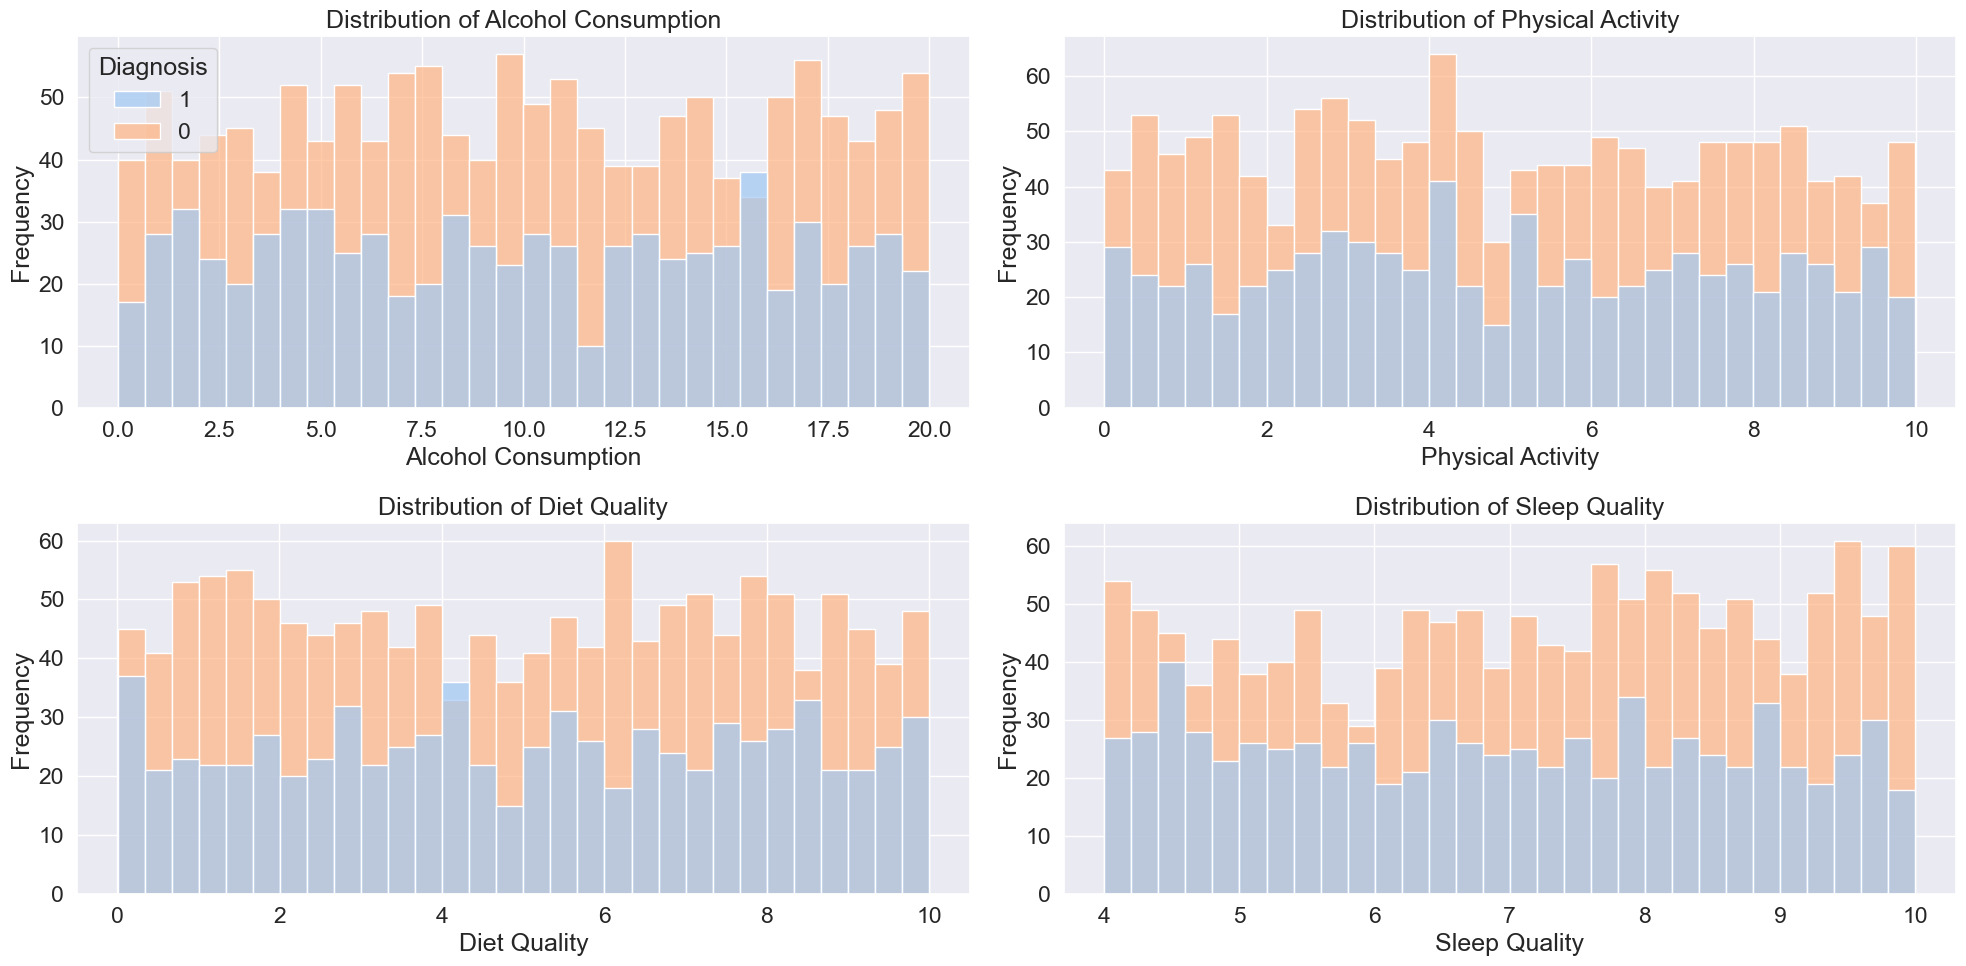

In [ ]:
# Dataset distribution in AlcoholConsumption, PhysicalActivity, DietQuality, and SleepQuality


warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

hue_order = [1, 0]  # Adjust the order here

# Plotting each histogram with additional features
sns.histplot(ax=axes[0, 0], x='AlcoholConsumption', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='Distribution of Alcohol Consumption')
axes[0, 0].set_xlabel('Alcohol Consumption')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[0, 1], x='PhysicalActivity', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Physical Activity')
axes[0, 1].set_xlabel('Physical Activity')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 0], x='DietQuality', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Diet Quality')
axes[1, 0].set_xlabel('Diet Quality')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 1], x='SleepQuality', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Sleep Quality')
axes[1, 1].set_xlabel('Sleep Quality')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("Frequency.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()


In [ ]:
# Create a new column as target_label
df['target_lebel']=df['Diagnosis'].map({0:'NO', 1:'YES'})

In [ ]:
# Create a new column as Gender_label
df['Gender_lebel']=df['Gender'].map({0:'Male', 1:'Female'})

In [ ]:
df['target_lebel'].value_counts()

target_lebel
NO     1389
YES     760
Name: count, dtype: int64

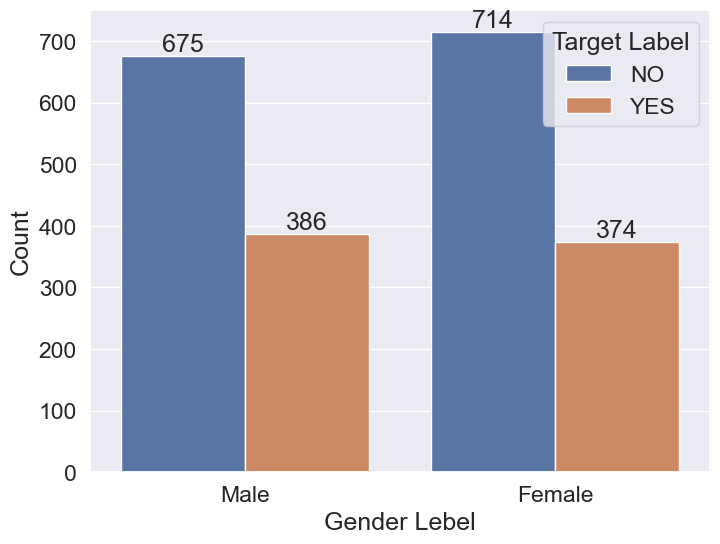

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = df, x = 'Gender_lebel', hue = 'target_lebel')
ax.set(xlabel='Gender Lebel', ylabel='Count')
plt.legend(title="Target Label")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Gender Count.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

In [ ]:
# Create a new column as Smoking_label
df['Smoking_label']=df['Smoking'].map({0:'Non-Smoker', 1:'Smoker'})

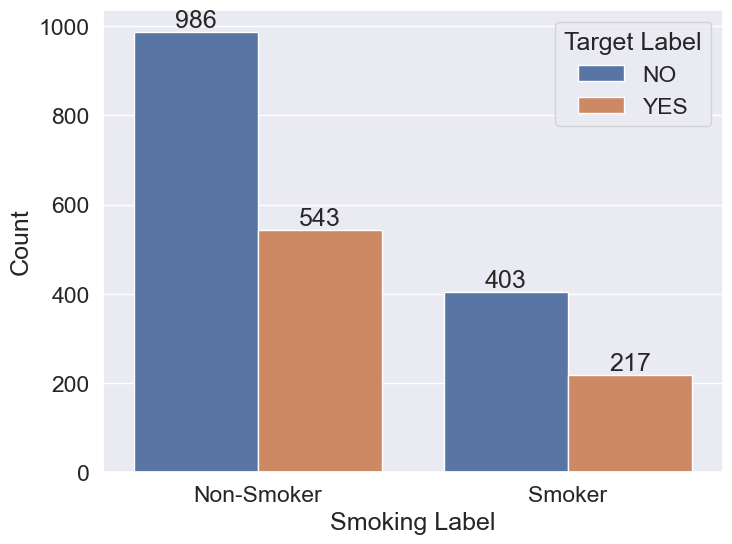

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = df, x = 'Smoking_label', hue = 'target_lebel')
ax.set(xlabel='Smoking Label', ylabel='Count')
plt.legend(title="Target Label")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Smoking Count.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

In [ ]:
# Create a new column as Diabetes_label
df['Diabetes_label']=df['Diabetes'].map({0:'No', 1:'YES'})

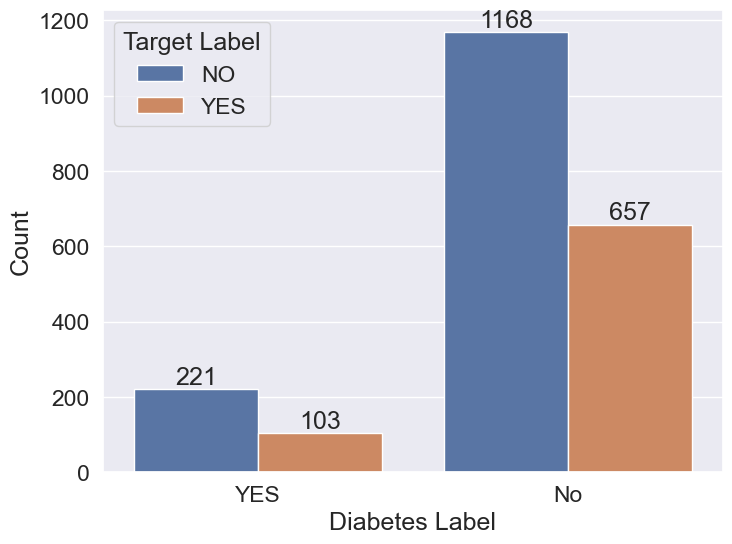

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = df, x = 'Diabetes_label', hue = 'target_lebel')
ax.set(xlabel='Diabetes Label', ylabel='Count')
plt.legend(title="Target Label")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Diabetes Count.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

In [ ]:
# Create a new column as Depression_label
df['Depression_label']=df['Depression'].map({0:'No', 1:'YES'})

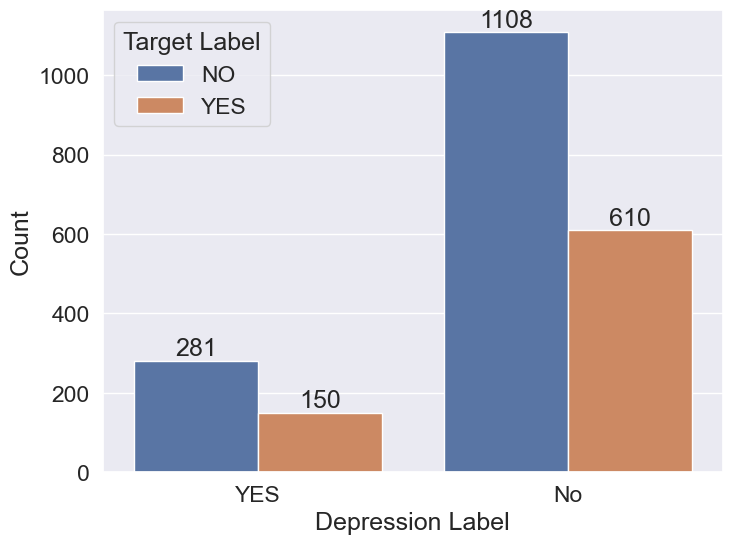

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = df, x = 'Depression_label', hue = 'target_lebel')
ax.set(xlabel='Depression Label', ylabel='Count')
plt.legend(title="Target Label")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Depression Count.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

In [ ]:
# Create a new column as MemoryComplaints_label
df['MemoryComplaints_label']=df['MemoryComplaints'].map({0:'No', 1:'YES'})

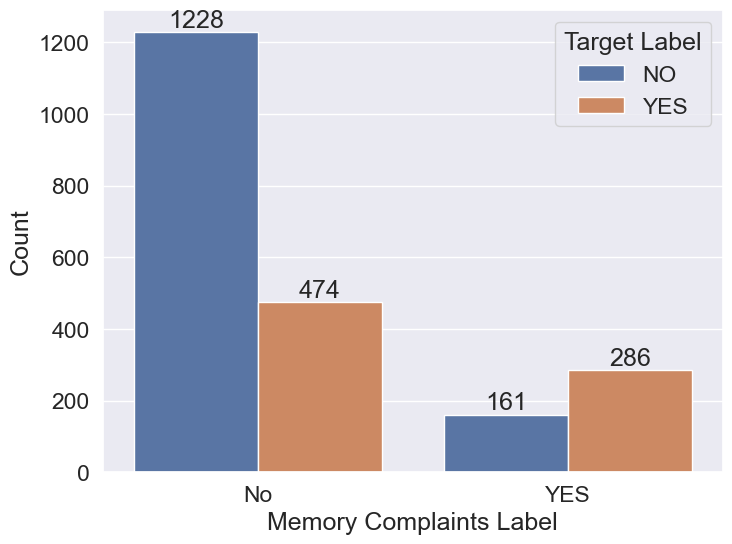

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = df, x = 'MemoryComplaints_label', hue = 'target_lebel')
ax.set(xlabel='Memory Complaints Label', ylabel='Count')
plt.legend(title="Target Label")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Memory Count.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

In [ ]:
# Create a new column as BehavioralProblems_label
df['BehavioralProblems_label']=df['BehavioralProblems'].map({0:'No', 1:'YES'})

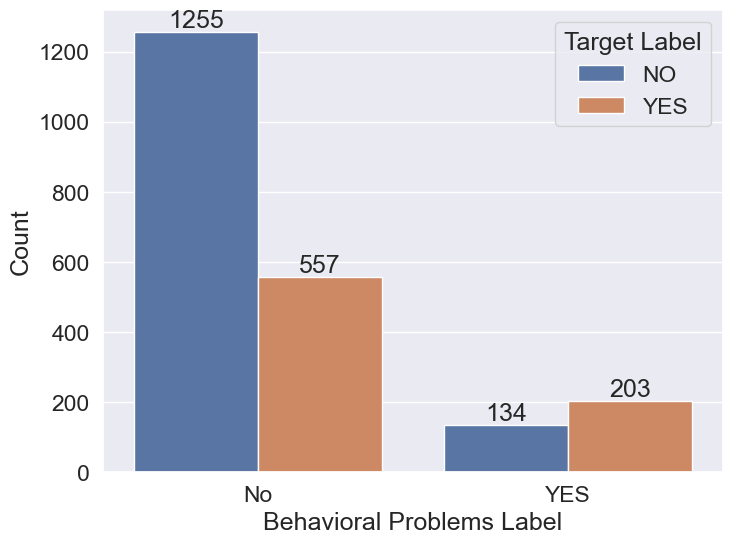

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = df, x = 'BehavioralProblems_label', hue = 'target_lebel')
ax.set(xlabel='Behavioral Problems Label', ylabel='Count')
plt.legend(title="Target Label")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Behavioral Count.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

In [ ]:
# Create a new column as Ethnicity_label
df['Ethnicity_label']=df['Ethnicity'].map({0:'Caucasian', 1:'African & \nAmerican', 2:'Asian', 3:'Others'})

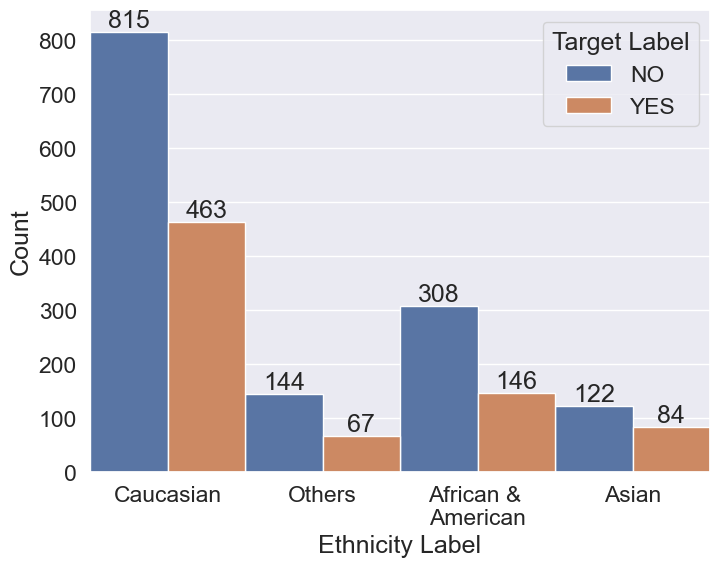

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data = df, x = 'Ethnicity_label', hue = 'target_lebel', width=1.0)
ax.set(xlabel='Ethnicity Label', ylabel='Count')
plt.legend(title="Target Label")
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig("Ethnicity Count.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

# Convert imbalanced dataset into balanced dataset using SMOTE

In [16]:
# drop unimportaint colums
dataset.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)
dataset.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


In [17]:
dataset.shape

(2149, 33)

In [18]:
X=dataset.drop(columns=['Diagnosis'])
y=dataset['Diagnosis']

In [19]:
X.shape

(2149, 32)

In [20]:
y.shape

(2149,)

In [21]:
# Step 2: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [22]:
np.unique(y_resampled, return_counts=True)[1]

array([1389, 1389])

In [23]:
# Convert the resampled data back to a DataFrame
bdataset = pd.DataFrame(X_resampled, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
bdataset["Label"] = y_resampled

In [24]:
bdataset.shape

(2778, 33)

In [25]:
# Define the colors for each bar
colors = ['#1f77b4', '#ff7f0e']
df.target_lebel.value_counts().plot.bar(color=colors)
plt.ylabel("Number of Patients", labelpad=12)
plt.xlabel("Diagnosis Class", labelpad=12)
plt.xticks(rotation = 0)
plt.yticks()
plt.title("Dataset Distribution \n(Before balancing)", y=1.02)
plt.savefig("Data Distribution BB.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

NameError: name 'df' is not defined

In [26]:
# Create a new column as Diabetes_label
bdataset['new']=bdataset['Label'].map({0:'No', 1:'YES'})

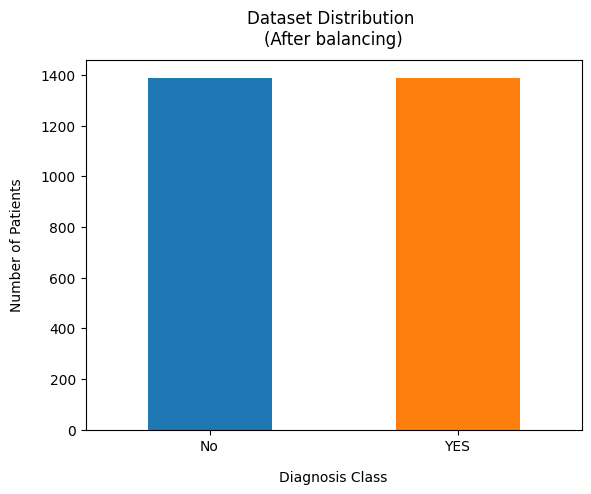

In [27]:
# Define the colors for each bar
colors = ['#1f77b4', '#ff7f0e']
bdataset.new.value_counts().plot.bar(color=colors)
plt.ylabel("Number of Patients", labelpad=12)
plt.xlabel("Diagnosis Class", labelpad=12)
plt.xticks(rotation = 0)
plt.title("Dataset Distribution \n(After balancing)", y=1.02)
plt.savefig("Data Distribution AB.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

## Applying ML model without finding feature importance and default hyperparameter tuning

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state= 30, stratify=y_resampled)

In [ ]:
#X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.20, random_state= 30, stratify=y_resampled)

In [ ]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(2222, 32)
(556, 32)
(2222,)
(556,)


# KNN model

In [ ]:
k_model = KNeighborsClassifier()
k_model.fit(X_Train, Y_Train)

KNeighborsClassifier()

In [ ]:
predictions = k_model.predict(X_Test)

In [ ]:
with open('k_model.pkl','wb') as f:
    pickle.dump(k_model,f)

[[138 140]
 [ 66 212]]


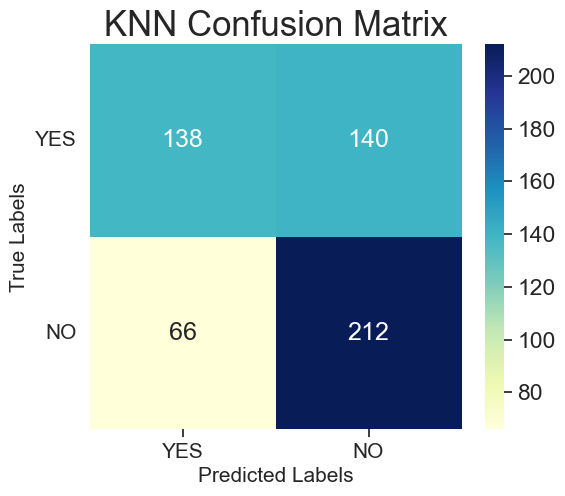

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('KNN Confusion Matrix', fontsize=25)

plt.savefig('KNN Depression Confusion Matrix.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.68      0.50      0.57       278
      YES(1)       0.60      0.76      0.67       278

    accuracy                           0.63       556
   macro avg       0.64      0.63      0.62       556
weighted avg       0.64      0.63      0.62       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy_knn = accuracy_score(Y_Test, predictions)
precision_knn = precision_score(Y_Test, predictions, average='macro')
recall_knn = recall_score(Y_Test, predictions, average='macro')
f1_knn = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.4f" %(accuracy_knn*100))
print("Precision: %.4f" %(precision_knn*100))
print("Recall: %.4f" %(recall_knn*100))
print("F1-score: %.4f" %(f1_knn*100))

Accuracy: 62.9496
Precision: 63.9372
Recall: 62.9496
F1-score: 62.2815


In [ ]:
k_model = pickle.load(open("k_model.pkl", 'rb'))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Function to plot ROC curve
def plot_roc_curve(y_test, y_score, n_classes, title):
    # Binarize the output labels
    class_labels = ['NO', 'YES']

    # Check if y_test has more than one unique class
    if len(np.unique(y_test)) > 1:
        y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
    else:
        y_test_bin = y_test.reshape(-1, 1)  # Reshape to 2D if necessary

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_score[:, i] if y_score.ndim > 1 else y_score)  # Handle single-column y_score
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.rcParams.update({'font.size': 20, 'font.weight': 'normal'})
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_labels[i]} (AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

    plt.show()

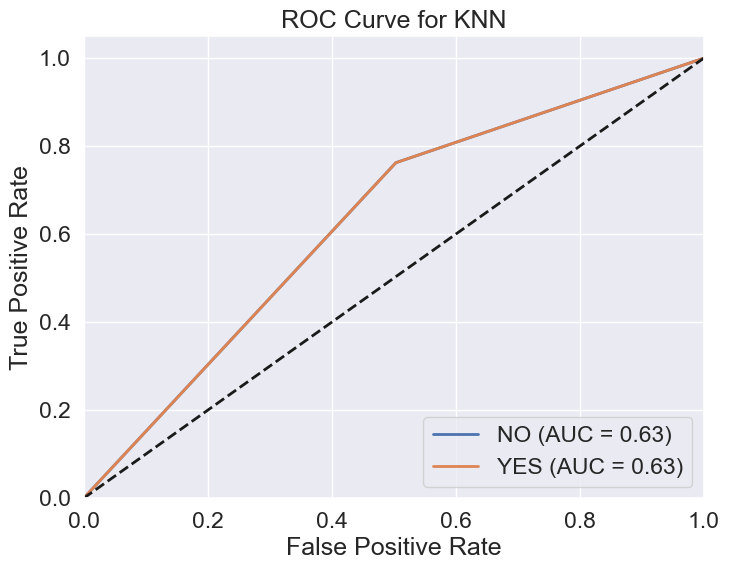

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for KNN')

SVM model

In [ ]:
svm_model = SVC(probability=True)
svm_model.fit(X_Train, Y_Train)

SVC(probability=True)

In [ ]:
predictions = svm_model.predict(X_Test)

In [ ]:
with open('svm_model.pkl','wb') as f:
    pickle.dump(svm_model,f)

[[168 110]
 [ 83 195]]


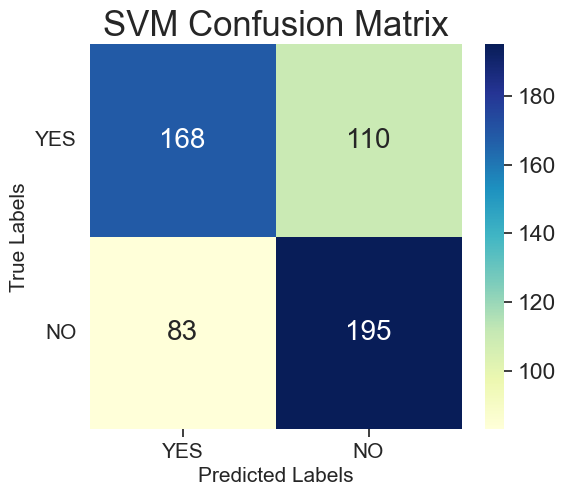

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('SVM Confusion Matrix', fontsize=25)

plt.savefig('SVM Depression Confusion Matrix.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.67      0.60      0.64       278
      YES(1)       0.64      0.70      0.67       278

    accuracy                           0.65       556
   macro avg       0.65      0.65      0.65       556
weighted avg       0.65      0.65      0.65       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy_svm = accuracy_score(Y_Test, predictions)
precision_svm = precision_score(Y_Test, predictions, average='macro')
recall_svm = recall_score(Y_Test, predictions, average='macro')
f1_svm = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.4f" %(accuracy_svm*100))
print("Precision: %.4f" %(precision_svm*100))
print("Recall: %.4f" %(recall_svm*100))
print("F1-score: %.4f" %(f1_svm*100))

Accuracy: 65.2878
Precision: 65.4333
Recall: 65.2878
F1-score: 65.2057


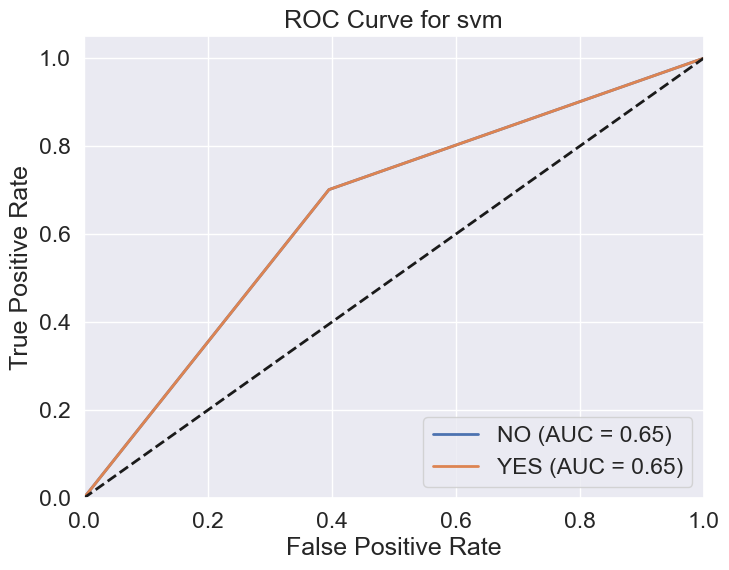

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for svm')

# Random Forest

In [ ]:
#Training the model on depression dataset
rf_model = RandomForestClassifier()
rf_model.fit(X_Train, Y_Train)

RandomForestClassifier()

In [ ]:
predictions = rf_model.predict(X_Test)

In [ ]:
with open('rf_model.pkl','wb') as f:
    pickle.dump(rf_model,f)

In [ ]:
predictions

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,

[[266  12]
 [ 45 233]]


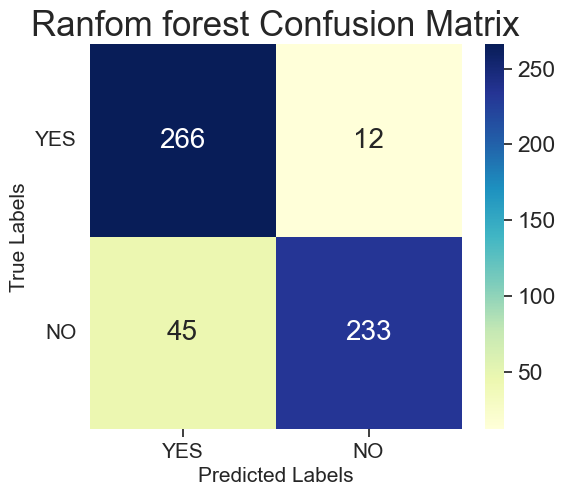

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Ranfom forest Confusion Matrix', fontsize=25)

plt.savefig('RF Confusion Matrix.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.86      0.96      0.90       278
      YES(1)       0.95      0.84      0.89       278

    accuracy                           0.90       556
   macro avg       0.90      0.90      0.90       556
weighted avg       0.90      0.90      0.90       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy_rf = accuracy_score(Y_Test, predictions)
precision_rf = precision_score(Y_Test, predictions, average='macro')
recall_rf = recall_score(Y_Test, predictions, average='macro')
f1_rf = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.2f" %(accuracy_rf*100))
print("Precision: %.2f" %(precision_rf*100))
print("Recall: %.2f" %(recall_rf*100))
print("F1-score: %.2f" %(f1_rf*100))

Accuracy: 89.75
Precision: 90.32
Recall: 89.75
F1-score: 89.71


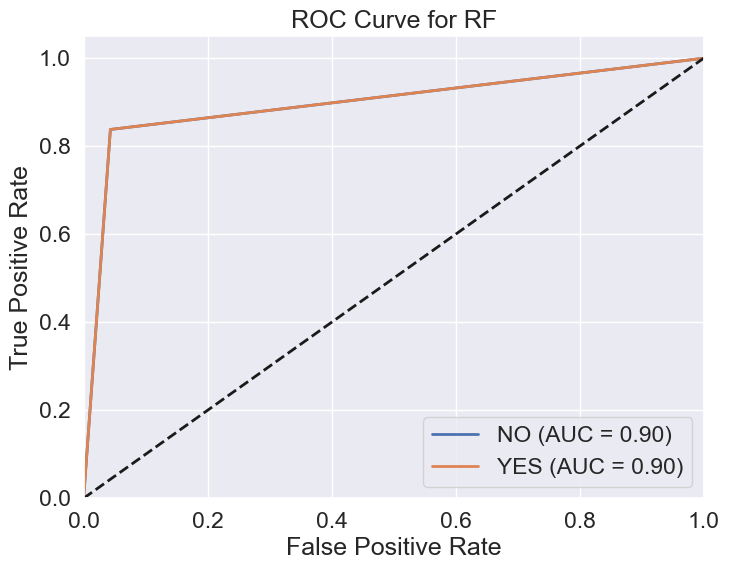

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for RF')

# Decesion Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_Train, Y_Train)

DecisionTreeClassifier()

In [ ]:
predictions = dt_model.predict(X_Test)

In [ ]:
with open('dt_model.pkl','wb') as f:
    pickle.dump(dt_model,f)

In [ ]:
predictions

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,

[[238  40]
 [ 47 231]]


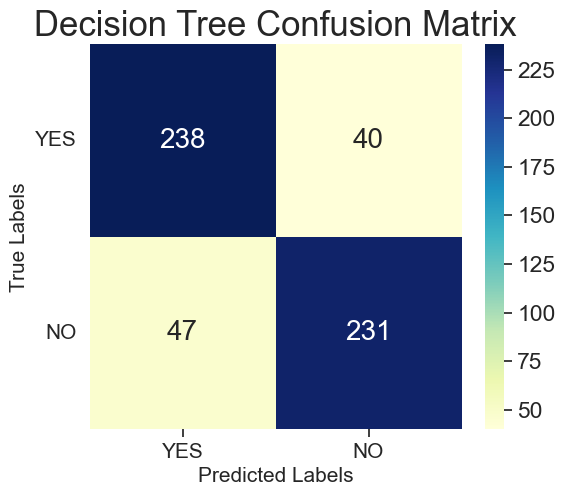

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Decision Tree Confusion Matrix', fontsize=25)

plt.savefig('DT Confusion Matrix.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.84      0.86      0.85       278
      YES(1)       0.85      0.83      0.84       278

    accuracy                           0.84       556
   macro avg       0.84      0.84      0.84       556
weighted avg       0.84      0.84      0.84       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy_dt = accuracy_score(Y_Test, predictions)
precision_dt = precision_score(Y_Test, predictions, average='macro')
recall_dt = recall_score(Y_Test, predictions, average='macro')
f1_dt = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.2f" %(accuracy_dt*100))
print("Precision: %.2f" %(precision_dt*100))
print("Recall: %.2f" %(recall_dt*100))
print("F1-score: %.2f" %(f1_dt*100))

Accuracy: 84.35
Precision: 84.37
Recall: 84.35
F1-score: 84.35


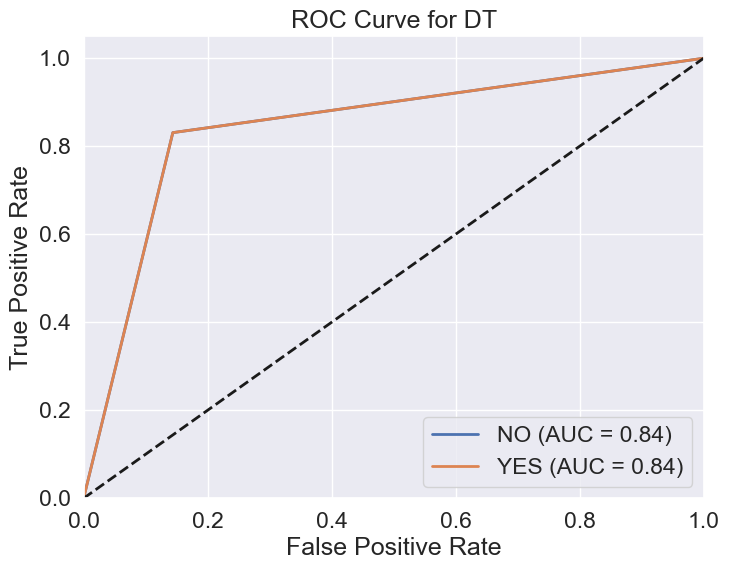

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for DT')

# LR Classifier

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_Train, Y_Train)

c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
predictions = lr_model.predict(X_Test)

In [ ]:
with open('lr_model.pkl','wb') as f:
    pickle.dump(lr_model,f)

[[206  72]
 [ 56 222]]


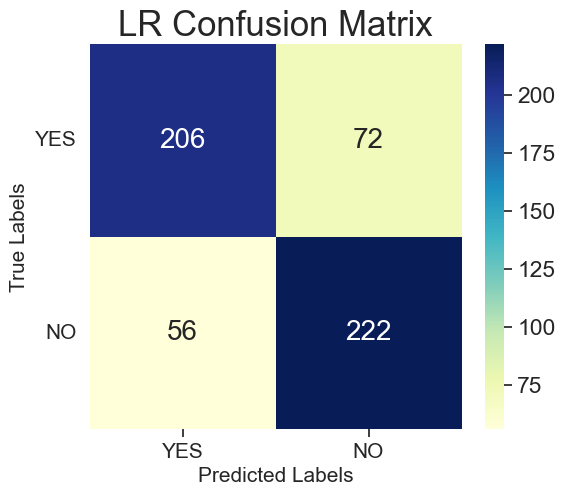

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('LR Confusion Matrix', fontsize=25)

plt.savefig('NB Confusion Matrix.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
predictions

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.79      0.74      0.76       278
      YES(1)       0.76      0.80      0.78       278

    accuracy                           0.77       556
   macro avg       0.77      0.77      0.77       556
weighted avg       0.77      0.77      0.77       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy_lr = accuracy_score(Y_Test, predictions)
precision_lr = precision_score(Y_Test, predictions, average='macro')
recall_lr = recall_score(Y_Test, predictions, average='macro')
f1_lr = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.2f" %(accuracy_lr*100))
print("Precision: %.2f" %(precision_lr*100))
print("Recall: %.2f" %(recall_lr*100))
print("F1-score: %.2f" %(f1_lr*100))

Accuracy: 76.98
Precision: 77.07
Recall: 76.98
F1-score: 76.96


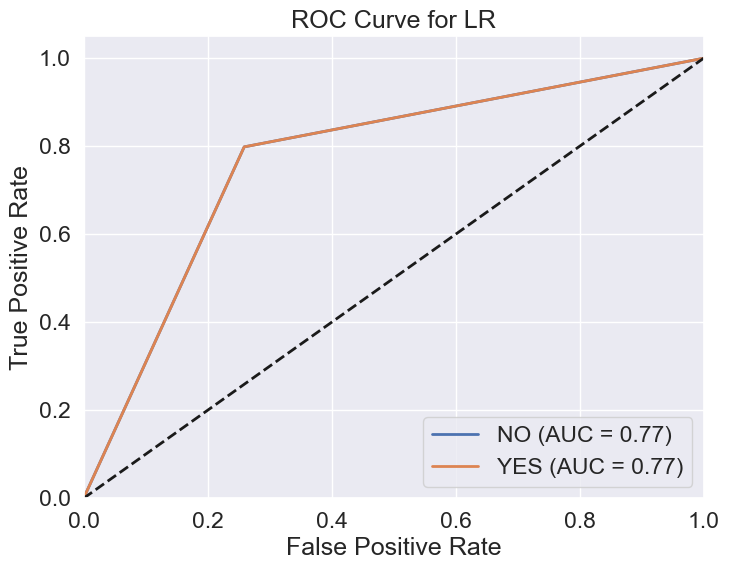

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for LR')

# ROC Curve for all ML model

c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


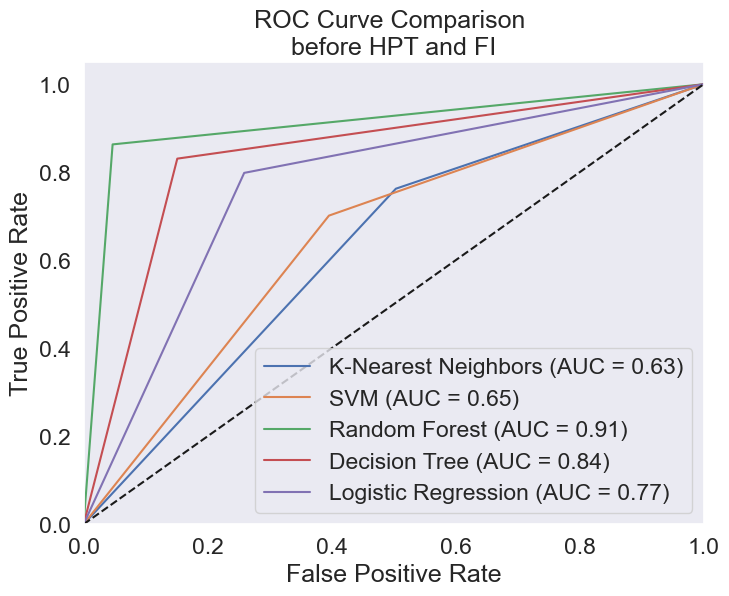

In [ ]:
#X_Train, X_Test, Y_Train, Y_Test
# Initialize classifiers
from sklearn.metrics import roc_auc_score


classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Plot ROC curve
plt.figure(figsize=(8, 6))

for name, clf in classifiers.items():
    # Fit classifier
    clf.fit(X_Train, Y_Train)

    # Predict probabilities
    y_pred = clf.predict(X_Test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(Y_Test, y_pred)
    roc_auc = roc_auc_score(Y_Test, y_pred)

    # Plot
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison \nbefore HPT and FI')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ROC all Before.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

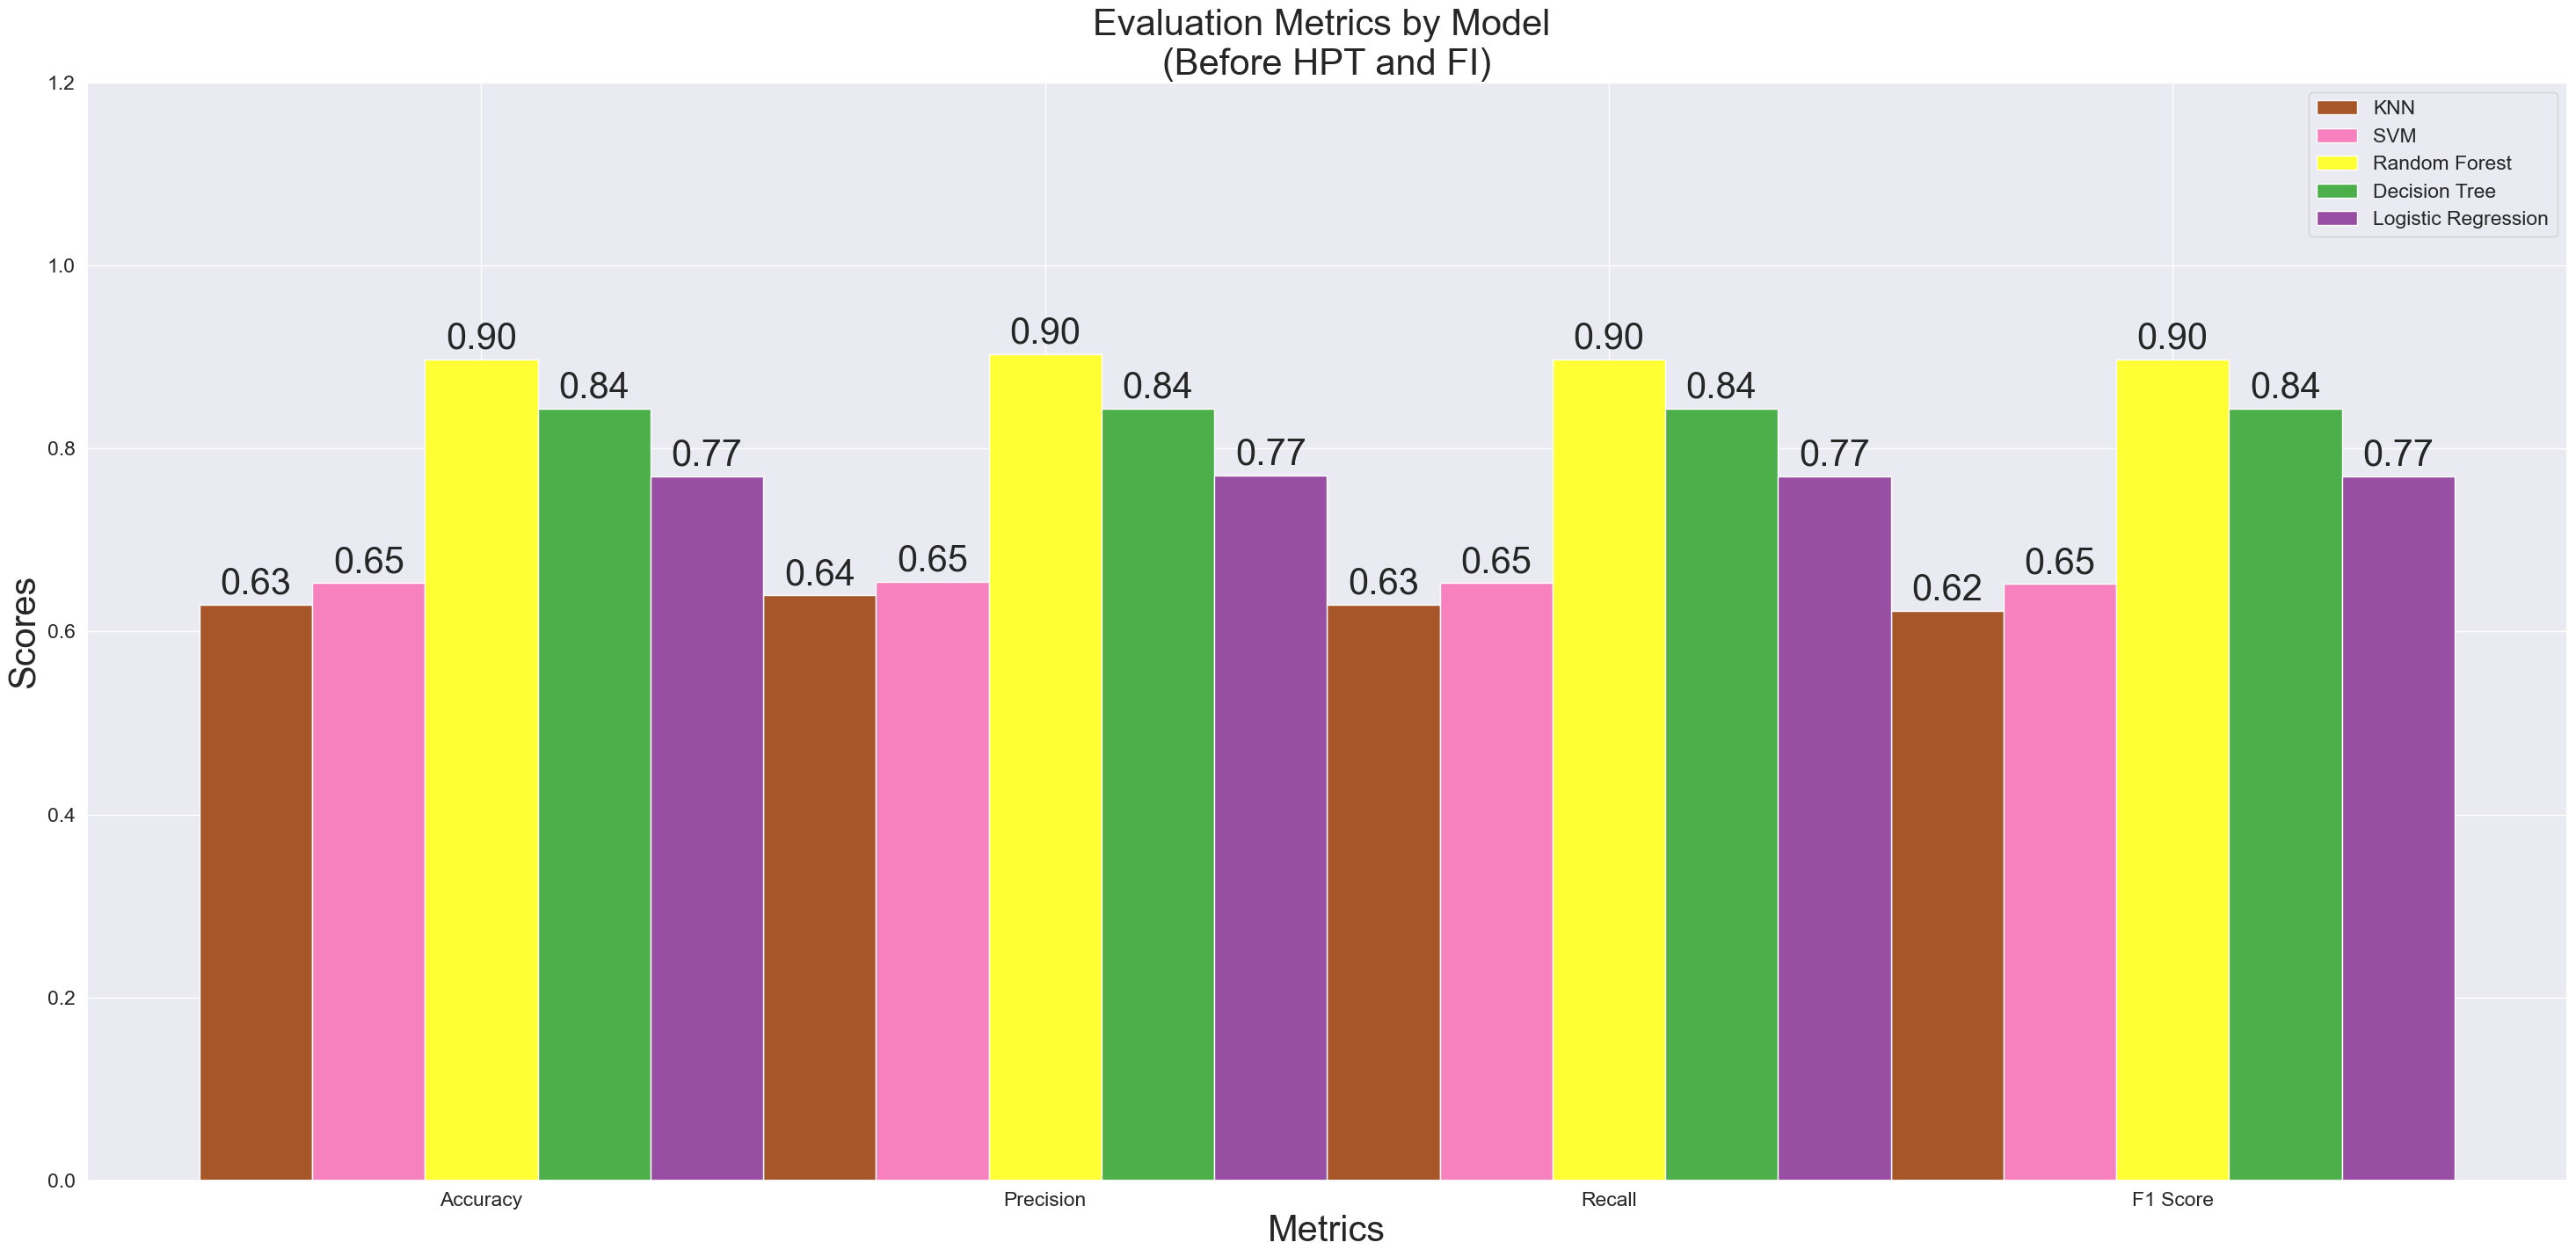

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Combine metrics for visualization
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
knn_metrics = [accuracy_knn, precision_knn, recall_knn, f1_knn]
svm_metrics = [accuracy_svm, precision_svm, recall_svm, f1_svm]
rf_metrics = [accuracy_rf, precision_rf, recall_rf, f1_rf]
dt_metrics = [accuracy_dt, precision_dt, recall_dt, f1_dt]
lr_metrics = [accuracy_lr, precision_lr, recall_lr, f1_lr]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars # Adjusted width for better visualization

fig, ax = plt.subplots(figsize=(30, 15))

# Set vibrant colors for the bars
colors = ['#a65628', '#f781bf', '#ffff33', '#4daf4a', '#984ea3'] # Added more colors


# Use the correct metric variables here:
rects1 = ax.bar(x - 2 * width, knn_metrics, width, label='KNN', color=colors[0])
rects2 = ax.bar(x - width, svm_metrics, width, label='SVM', color=colors[1])
rects3 = ax.bar(x, rf_metrics, width, label='Random Forest', color=colors[2])
rects4 = ax.bar(x + width, dt_metrics, width, label='Decision Tree', color=colors[3])
rects5 = ax.bar(x + 2 * width, lr_metrics, width, label='Logistic Regression', color=colors[4])

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.rcParams.update({'font.size': 30, 'font.weight': 'normal'})
ax.set_xlabel('Metrics', fontsize=30)
ax.set_ylabel('Scores', fontsize=30)
ax.set_title('Evaluation Metrics by Model \n(Before HPT and FI)', fontsize=30) # Updated title
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.2)
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

# Save the plot as an image file
plt.savefig('evaluation_metrics_after_hpt_fi.png', bbox_inches='tight', facecolor='white', transparent=False) # Updated filename

# Show the plot
plt.show()

# Find the feature importance and calculate the models' performance again

We will use DT classifier for finding feature importance

In [31]:
# Create a Decision Tree Classifier
fi_dt_model = DecisionTreeClassifier(random_state=30)
# Train a decision tree model
fi_dt_model.fit(X_Train, Y_Train)

# Get feature importances
feature_importances = fi_dt_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_Train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

                      Feature  Importance
23       FunctionalAssessment    0.204502
22                       MMSE    0.187891
26                        ADL    0.175175
24           MemoryComplaints    0.088480
25         BehavioralProblems    0.064519
7            PhysicalActivity    0.033750
18           CholesterolTotal    0.025813
16                 SystolicBP    0.022864
21   CholesterolTriglycerides    0.021470
6          AlcoholConsumption    0.018970
19             CholesterolLDL    0.017983
20             CholesterolHDL    0.015239
17                DiastolicBP    0.014293
4                         BMI    0.011314
13                 Depression    0.010592
9                SleepQuality    0.009696
3              EducationLevel    0.009150
0                         Age    0.008594
5                     Smoking    0.007691
2                   Ethnicity    0.006457
27                  Confusion    0.005601
31              Forgetfulness    0.005447
10    FamilyHistoryAlzheimers    0

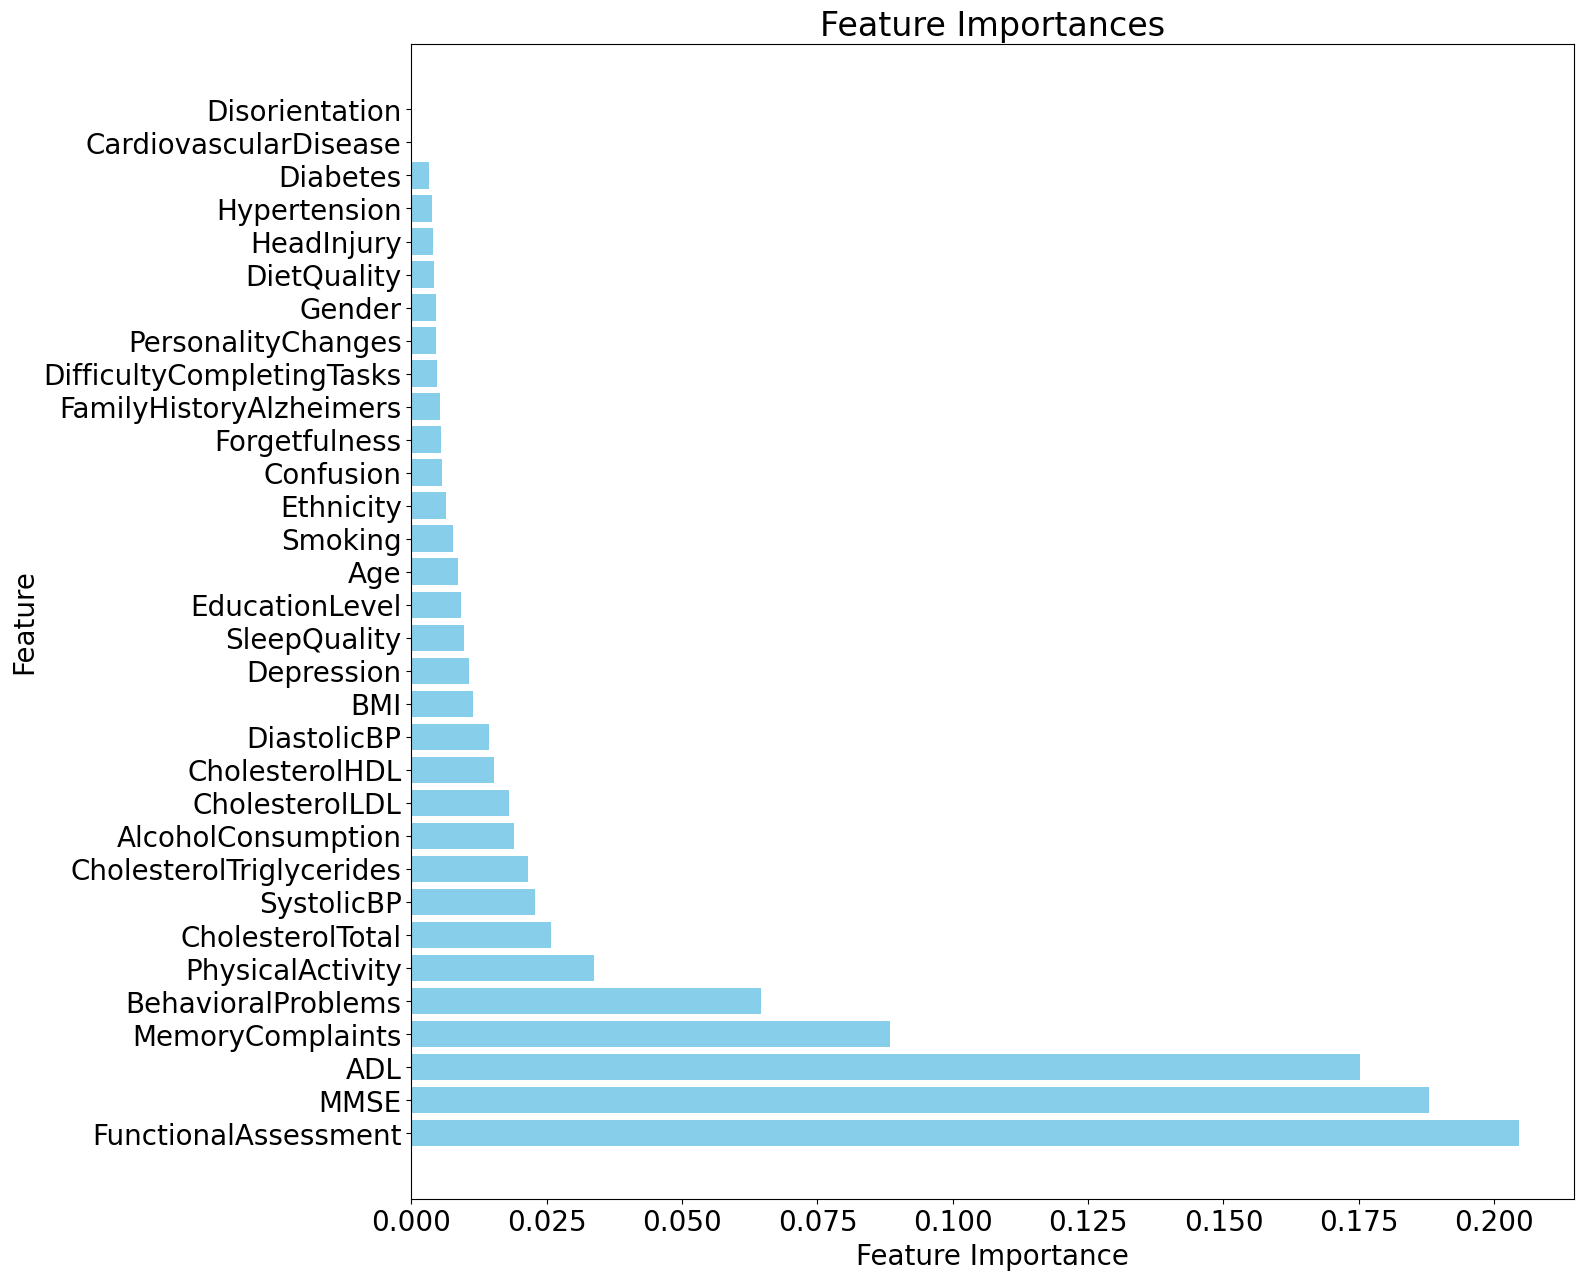

In [32]:
plt.rcParams.update({'font.size': 20, 'font.weight': 'normal'})
plt.figure(figsize=(15, 15))
# Extract feature importances and their corresponding names
importances = fi_dt_model.feature_importances_
features = X_Train.columns

# Sort features by their importance
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = [features[i] for i in sorted_indices]

# Plot the feature importances
#plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importances, align='center', color='skyblue')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

#download
plt.savefig('Feature Importances.png', bbox_inches='tight', facecolor='white', transparent=False)

plt.show()

Taking Top 20 features for further investigation

In [33]:
top_20_features = importance_df.head(20)['Feature'].tolist()

In [35]:
print(top_20_features)

['FunctionalAssessment', 'MMSE', 'ADL', 'MemoryComplaints', 'BehavioralProblems', 'PhysicalActivity', 'CholesterolTotal', 'SystolicBP', 'CholesterolTriglycerides', 'AlcoholConsumption', 'CholesterolLDL', 'CholesterolHDL', 'DiastolicBP', 'BMI', 'Depression', 'SleepQuality', 'EducationLevel', 'Age', 'Smoking', 'Ethnicity']


In [40]:
print(X_Train.head())

      FunctionalAssessment       MMSE       ADL  MemoryComplaints  \
239               8.008733  25.426067  2.360107                 1   
193               5.467277  20.533111  9.426069                 0   
550               4.281652  13.821722  9.675192                 0   
1158              4.089175  22.704201  3.318913                 1   
1307              8.438040   0.046928  7.295883                 0   

      BehavioralProblems  PhysicalActivity  CholesterolTotal  SystolicBP  \
239                    1          7.008936        261.714519         127   
193                    0          3.247181        166.127584         166   
550                    0          4.560890        203.143314          91   
1158                   0          4.577978        280.784643         160   
1307                   0          8.592732        224.140081          99   

      CholesterolTriglycerides  AlcoholConsumption  CholesterolLDL  \
239                 185.708377           13.885033      12

In [36]:
X_Train = X_Train[top_20_features]
X_Test = X_Test[top_20_features]

In [37]:
X_Train.shape

(2222, 20)

In [38]:
X_Test.shape

(556, 20)

# We will use Randomized Search CV for finding best hyperparameter

## KNN model

In [ ]:
knn = KNeighborsClassifier()

# Define the hyperparameter space
param_distributions = {
    'n_neighbors': np.arange(1, 21),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Search algorithm
    'leaf_size': np.arange(10, 51)  # Leaf size for tree-based algorithms
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn, # Use knn as the estimator
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to find the best hyperparameters
# Use X_Train and Y_Train, the data after SMOTE
random_search.fit(X_Train, Y_Train)

# Output the best hyperparameters and accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy on Training Data:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'weights': 'uniform', 'n_neighbors': 2, 'metric': 'manhattan', 'leaf_size': 38, 'algorithm': 'ball_tree'}
Best Accuracy on Training Data: 0.6957799372406115


In [ ]:
knn_model = KNeighborsClassifier(weights='uniform', n_neighbors=2, metric='manhattan', leaf_size=38, algorithm='ball_tree')
knn_model.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=38, metric='manhattan',
                     n_neighbors=2)

In [ ]:
predictions = knn_model.predict(X_Test)

In [ ]:
with open('knn_model.pkl','wb') as f:
    pickle.dump(knn_model,f)

[[209  69]
 [ 98 180]]


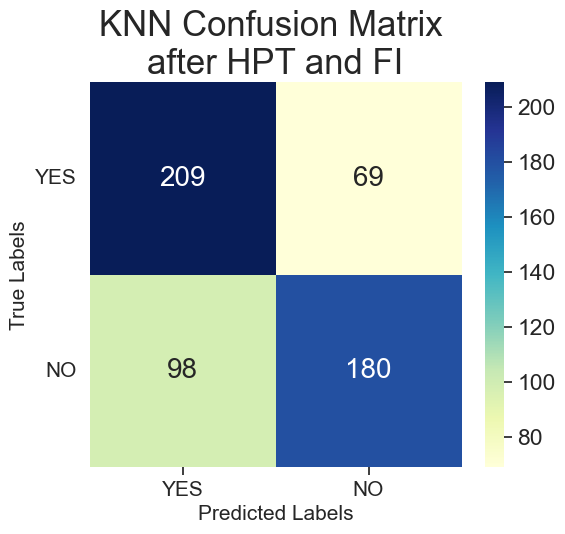

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=00)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('KNN Confusion Matrix \nafter HPT and FI', fontsize=25)

plt.savefig('KNN Confusion Matrix After.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.68      0.75      0.71       278
      YES(1)       0.72      0.65      0.68       278

    accuracy                           0.70       556
   macro avg       0.70      0.70      0.70       556
weighted avg       0.70      0.70      0.70       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
hy_accuracy_knn = accuracy_score(Y_Test, predictions)
hy_precision_knn = precision_score(Y_Test, predictions, average='macro')
hy_recall_knn = recall_score(Y_Test, predictions, average='macro')
hy_f1_knn = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.4f" %(hy_accuracy_knn*100))
print("Precision: %.4f" %(hy_precision_knn*100))
print("Recall: %.4f" %(hy_recall_knn*100))
print("F1-score: %.4f" %(hy_f1_knn*100))

Accuracy: 69.9640
Precision: 70.1837
Recall: 69.9640
F1-score: 69.8821


In [ ]:
k_model = pickle.load(open("k_model.pkl", 'rb'))

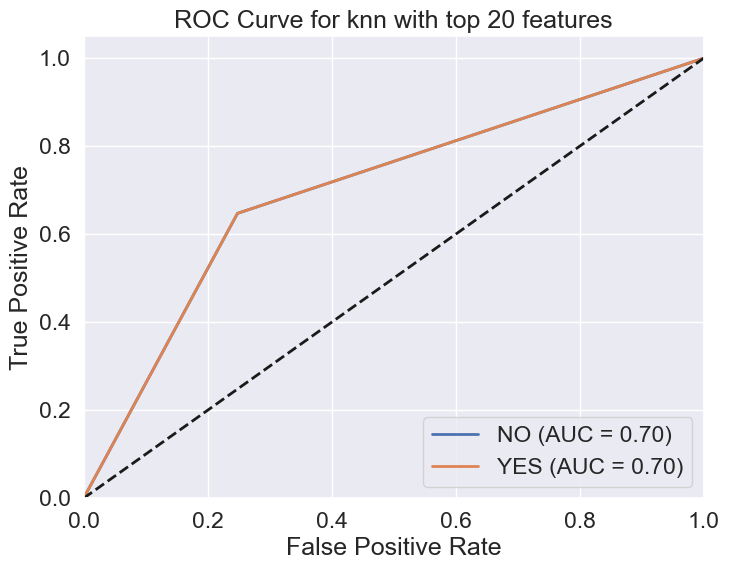

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for knn with top 20 features')

SVM model

In [ ]:
!pip install scipy

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
svm = SVC()

# Define the hyperparameter space
param_distributions = {
    'C': uniform(0.1, 100),  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernels
    'gamma': ['scale', 'auto', uniform(0.0001, 0.1)],  # Kernel coefficient
    'degree': randint(2, 6),  # Polynomial kernel degree
    'coef0': uniform(0, 1)  # Coefficient for 'poly' and 'sigmoid'
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm, # Use knn as the estimator
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=3,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to find the best hyperparameters
# Use X_Train and Y_Train, the data after SMOTE
random_search.fit(X_Train, Y_Train)

# Output the best hyperparameters and accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy on Training Data:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  Fi

Best Hyperparameters: {'C': 94.98855372533332, 'coef0': 0.9656320330745594, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
Best Accuracy on Training Data: 0.8073883996355906


In [ ]:
#Training the model on depression dataset
svm_model = SVC(C = .1, kernel = 'linear', gamma= 0.9, random_state=50, probability = True)
svm_model.fit(X_Train, Y_Train)

SVC(C=0.1, gamma=0.9, kernel='linear', probability=True, random_state=50)

In [ ]:
predictions = svm_model.predict(X_Test)

In [ ]:
with open('svm1_model.pkl','wb') as f:
    pickle.dump(svm_model,f)

[[218  60]
 [ 51 227]]


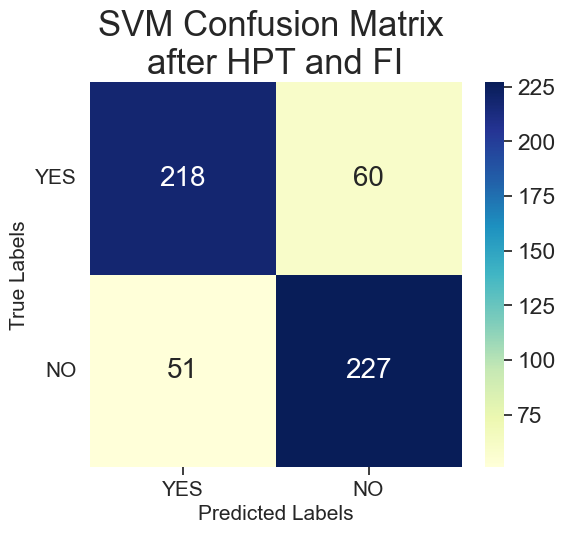

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=00)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('SVM Confusion Matrix \nafter HPT and FI', fontsize=25)

plt.savefig('SVM Depression Confusion Matrix After.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.81      0.78      0.80       278
      YES(1)       0.79      0.82      0.80       278

    accuracy                           0.80       556
   macro avg       0.80      0.80      0.80       556
weighted avg       0.80      0.80      0.80       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
hy_accuracy_svm = accuracy_score(Y_Test, predictions)
hy_precision_svm = precision_score(Y_Test, predictions, average='macro')
hy_recall_svm = recall_score(Y_Test, predictions, average='macro')
hy_f1_svm = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.4f" %(hy_accuracy_svm*100))
print("Precision: %.4f" %(hy_precision_svm*100))
print("Recall: %.4f" %(hy_recall_svm*100))
print("F1-score: %.4f" %(hy_f1_svm*100))

Accuracy: 80.0360
Precision: 80.0675
Recall: 80.0360
F1-score: 80.0307


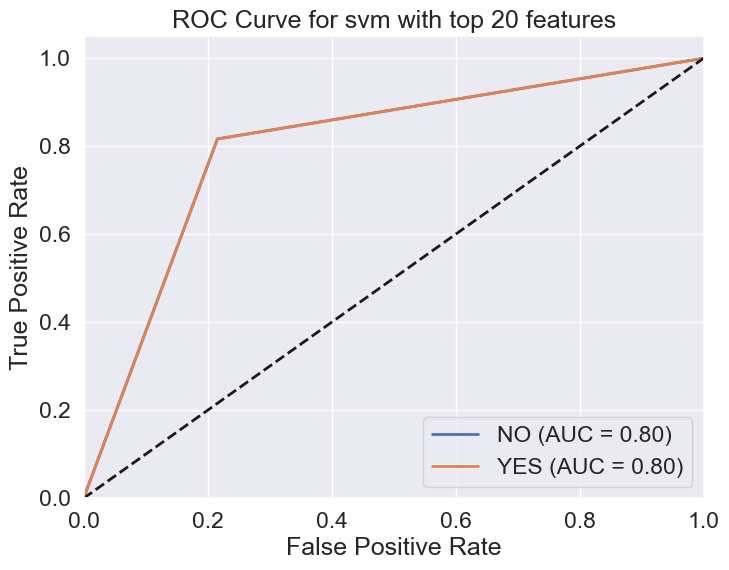

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for svm with top 20 features')

RF classifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter space
param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=50)],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, # Use knn as the estimator
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to find the best hyperparameters
# Use X_Train and Y_Train, the data after SMOTE
random_search.fit(X_Train, Y_Train)

# Output the best hyperparameters and accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy on Training Data:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 926, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 100, 'bootstrap': False}
Best Accuracy on Training Data: 0.9144933697742686


In [ ]:
#Training the model on depression dataset
rf_model = RandomForestClassifier(
                        n_estimators=926,
                        min_samples_split=2,
                        min_samples_leaf=1,
                        max_features='log2',
                        max_depth=100,
                        bootstrap=False
)
rf_model.fit(X_Train, Y_Train)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='log2',
                       n_estimators=926)

In [ ]:
predictions = rf_model.predict(X_Test)

In [ ]:
with open('rf1_model.pkl','wb') as f:
    pickle.dump(rf_model,f)

[[265  13]
 [ 36 242]]


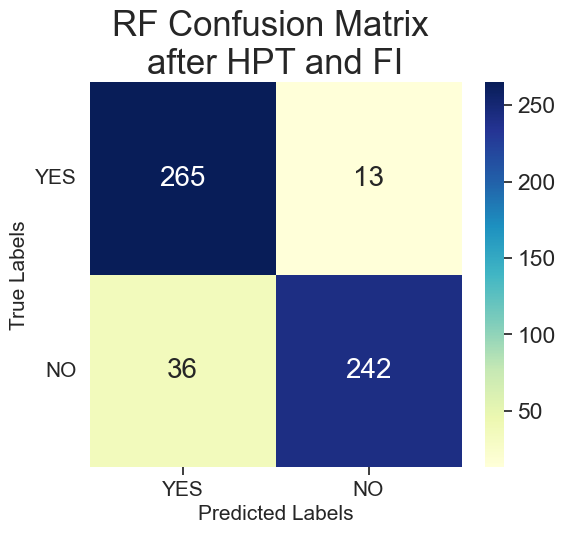

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('RF Confusion Matrix \nafter HPT and FI', fontsize=25)

plt.savefig('RF Depression Confusion Matrix After.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.88      0.95      0.92       278
      YES(1)       0.95      0.87      0.91       278

    accuracy                           0.91       556
   macro avg       0.91      0.91      0.91       556
weighted avg       0.91      0.91      0.91       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
hy_accuracy_rf = accuracy_score(Y_Test, predictions)
hy_precision_rf = precision_score(Y_Test, predictions, average='macro')
hy_recall_rf = recall_score(Y_Test, predictions, average='macro')
hy_f1_rf = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.4f" %(hy_accuracy_rf*100))
print("Precision: %.4f" %(hy_precision_rf*100))
print("Recall: %.4f" %(hy_recall_rf*100))
print("F1-score: %.4f" %(hy_f1_rf*100))

Accuracy: 91.1871
Precision: 91.4709
Recall: 91.1871
F1-score: 91.1719


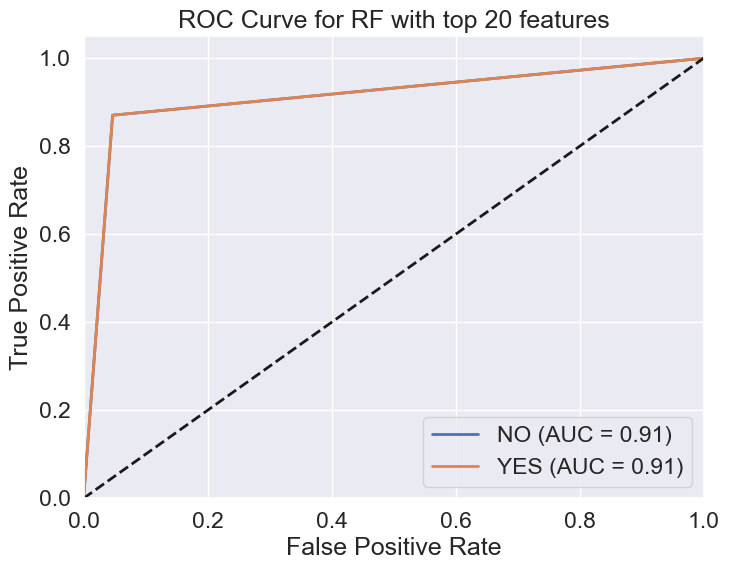

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for RF with top 20 features')

DT Classifier

In [ ]:
dt = DecisionTreeClassifier()

# Define the hyperparameter space
param_distributions = {
    'max_depth': randint(1, 21),  # max depth range
    'min_samples_split': randint(2, 21),  # min samples to split
    'min_samples_leaf': randint(1, 21),  # min samples at leaf
    'max_features': ['auto', 'sqrt', 'log2', None],  # feature selection
    'criterion': ['gini', 'entropy'],  # impurity measure
    'splitter': ['best', 'random'],  # split strategy
    'max_leaf_nodes': [None, randint(10, 100)]  # limit leaf nodes
}

# Initialize RandomizedSearchCV
# Use dt as the estimator since the parameters are for DecisionTreeClassifier
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=3,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_Train, Y_Train)

# Output the best hyperparameters and accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy on Training Data:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 12, 'min_samples_split': 9, 'splitter': 'best'}
Best Accuracy on Training Data: 0.8681526470290516


c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=15,
                                  max_features=None,
                                  max_leaf_nodes=None,
                                  min_samples_leaf=12,
                                  min_samples_split=9,
                                  splitter='best')
dt_model.fit(X_Train, Y_Train)
predictions = dt_model.predict(X_Test)

In [ ]:
with open('dt1_model.pkl','wb') as f:
    pickle.dump(dt_model,f)

[[254  24]
 [ 43 235]]


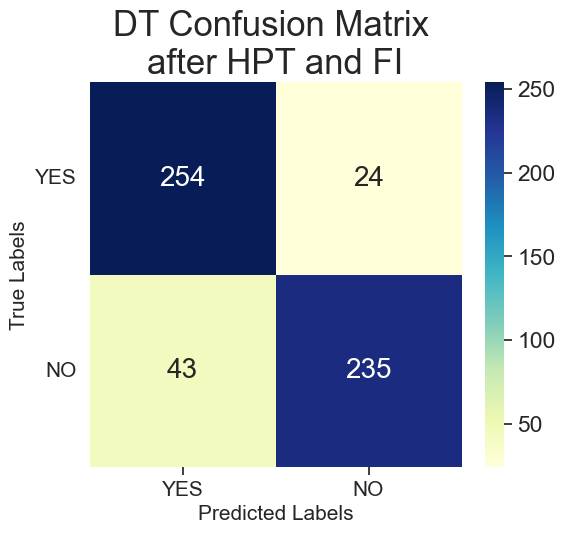

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('DT Confusion Matrix \nafter HPT and FI', fontsize=25)

plt.savefig('DT Confusion Matrix After.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.86      0.91      0.88       278
      YES(1)       0.91      0.85      0.88       278

    accuracy                           0.88       556
   macro avg       0.88      0.88      0.88       556
weighted avg       0.88      0.88      0.88       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
hy_accuracy_dt = accuracy_score(Y_Test, predictions)
hy_precision_dt = precision_score(Y_Test, predictions, average='macro')
hy_recall_dt = recall_score(Y_Test, predictions, average='macro')
hy_f1_dt = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.4f" %(hy_accuracy_dt*100))
print("Precision: %.4f" %(hy_precision_dt*100))
print("Recall: %.4f" %(hy_recall_dt*100))
print("F1-score: %.4f" %(hy_f1_dt*100))

Accuracy: 87.9496
Precision: 88.1277
Recall: 87.9496
F1-score: 87.9356


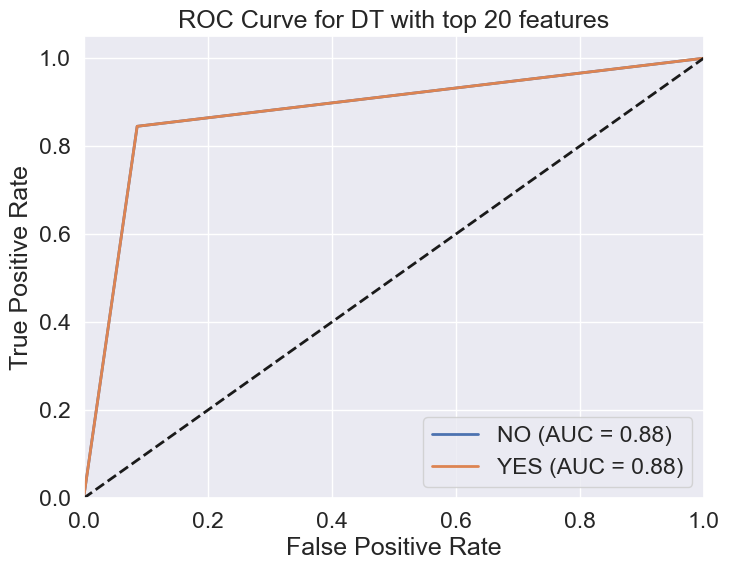

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for DT with top 20 features')

NB Classifier

In [ ]:
nb = GaussianNB()

# Define the hyperparameter space
param_distributions = {
    #'var_smoothing': np.logspace(0, -9, num=100)  # var_smoothing between 1 and 1e-9
    'var_smoothing': np.logspace(-9, 0, 100)
}

# Initialize RandomizedSearchCV
# Use dt as the estimator since the parameters are for DecisionTreeClassifier
random_search = RandomizedSearchCV(
    estimator=nb,
    param_distributions=param_distributions,
    n_iter=1000,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=3,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_Train, Y_Train)

# Output the best hyperparameters and accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy on Training Data:", random_search.best_score_)

c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 100 is smaller than n_iter=1000. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'var_smoothing': 5.336699231206313e-06}
Best Accuracy on Training Data: 0.827639437189999


In [ ]:
nb_model = GaussianNB(
          #var_smoothing= 5.336699231206313e-06
)
nb_model.fit(X_Train, Y_Train)
predictions = nb_model.predict(X_Test)

In [ ]:
with open('nb1_model.pkl','wb') as f:
    pickle.dump(nb_model,f)

[[216  62]
 [ 46 232]]


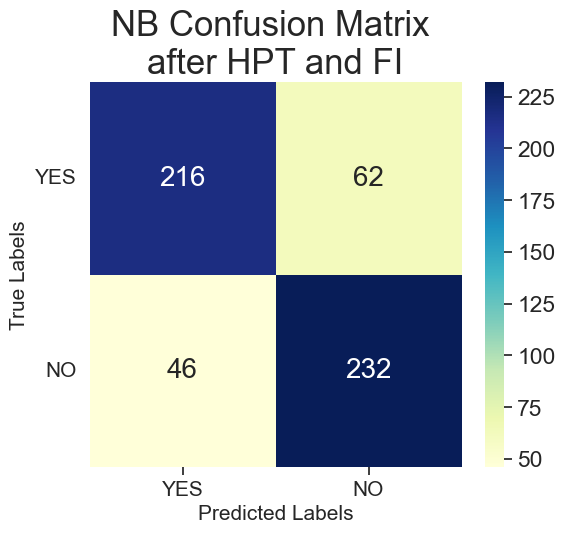

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('NB Confusion Matrix \nafter HPT and FI', fontsize=25)

plt.savefig('NB Confusion Matrix After.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.82      0.78      0.80       278
      YES(1)       0.79      0.83      0.81       278

    accuracy                           0.81       556
   macro avg       0.81      0.81      0.81       556
weighted avg       0.81      0.81      0.81       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
hy_accuracy_nb = accuracy_score(Y_Test, predictions)
hy_precision_nb = precision_score(Y_Test, predictions, average='macro')
hy_recall_nb = recall_score(Y_Test, predictions, average='macro')
hy_f1_nb = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.4f" %(hy_accuracy_nb*100))
print("Precision: %.4f" %(hy_precision_nb*100))
print("Recall: %.4f" %(hy_recall_nb*100))
print("F1-score: %.4f" %(hy_f1_nb*100))

Accuracy: 80.5755
Precision: 80.6772
Recall: 80.5755
F1-score: 80.5594


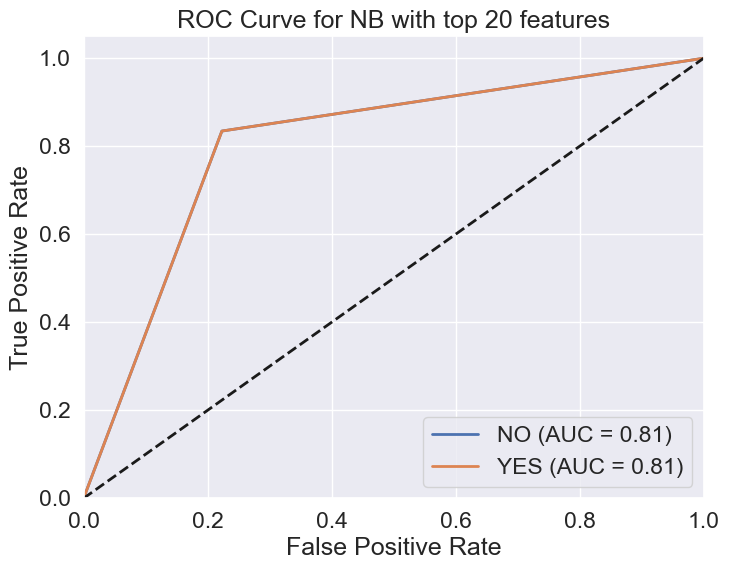

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for NB with top 20 features')

## LR classifier

In [ ]:
lr = LogisticRegression(random_state=42)

# Define the hyperparameter space
param_distributions = {
    'C': uniform(loc=0.01, scale=10),  # Test values between 0.01 and 10
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500]  # Number of iterations
}

# Initialize RandomizedSearchCV
# Use dt as the estimator since the parameters are for DecisionTreeClassifier
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=3,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_Train, Y_Train)

# Output the best hyperparameters and accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy on Training Data:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'C': 4.261558744912447, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy on Training Data: 0.8010912035631137


c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
105 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\nahid\anaconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_logistic.py", line 1204, in fit
    raise Valu

In [ ]:
lr_model = LogisticRegression(
    C=4.261558744912447, max_iter=200, penalty='l1', solver='liblinear'
)
lr_model.fit(X_Train, Y_Train)
predictions = lr_model.predict(X_Test)

[[216  62]
 [ 49 229]]


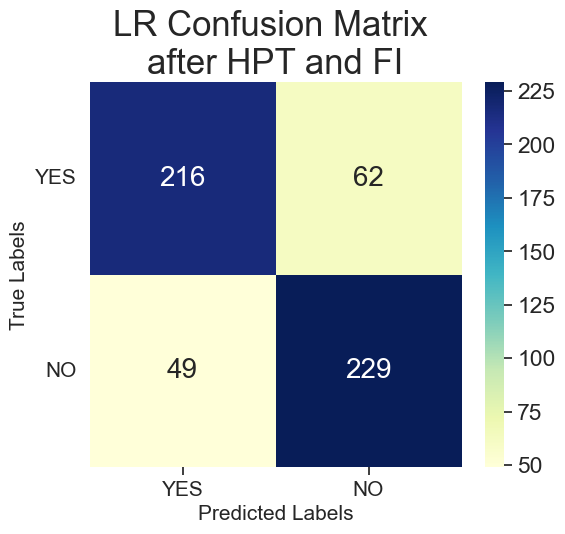

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('LR Confusion Matrix \nafter HPT and FI', fontsize=25)

plt.savefig('LR Confusion Matrix After.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.82      0.78      0.80       278
      YES(1)       0.79      0.82      0.80       278

    accuracy                           0.80       556
   macro avg       0.80      0.80      0.80       556
weighted avg       0.80      0.80      0.80       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
hy_accuracy_lr = accuracy_score(Y_Test, predictions)
hy_precision_lr = precision_score(Y_Test, predictions, average='macro')
hy_recall_lr = recall_score(Y_Test, predictions, average='macro')
hy_f1_lr = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.4f" %(hy_accuracy_lr*100))
print("Precision: %.4f" %(hy_precision_lr*100))
print("Recall: %.4f" %(hy_recall_lr*100))
print("F1-score: %.4f" %(hy_f1_lr*100))

Accuracy: 80.0360
Precision: 80.1018
Recall: 80.0360
F1-score: 80.0251


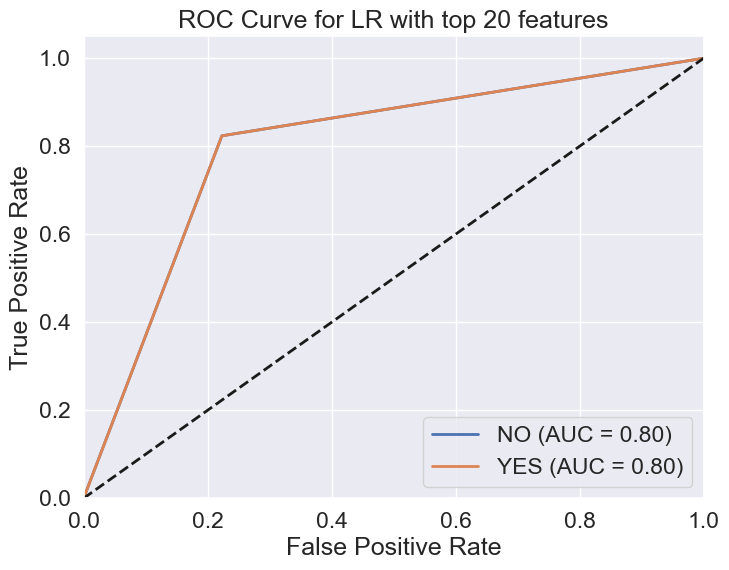

In [ ]:
plot_roc_curve(Y_Test, predictions, 2, 'ROC Curve for LR with top 20 features')

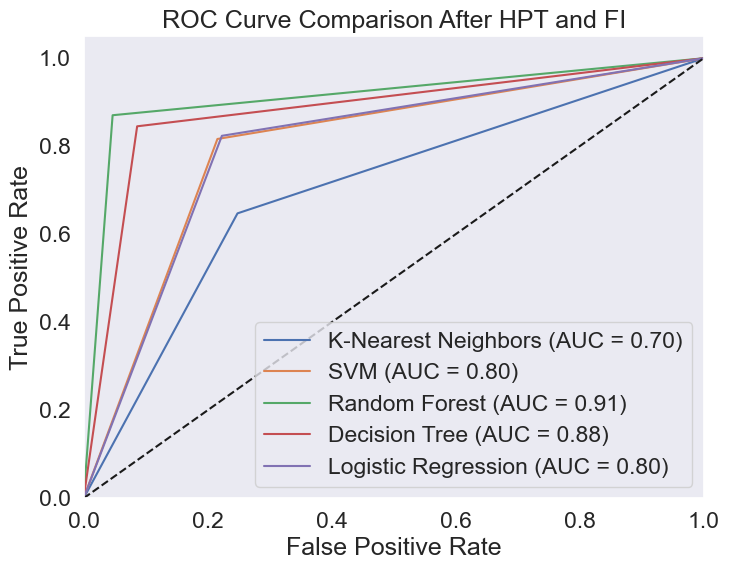

In [ ]:
#X_Train, X_Test, Y_Train, Y_Test
# Initialize classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(weights='uniform', n_neighbors=2, metric='manhattan', leaf_size=38, algorithm='ball_tree'),
    "SVM": SVC(C = .1, kernel = 'linear', gamma= 0.9, random_state=50, probability = True),
    "Random Forest": RandomForestClassifier(
                        n_estimators=926,
                        min_samples_split=2,
                        min_samples_leaf=1,
                        max_features='log2',
                        max_depth=100,
                        bootstrap=False),
    "Decision Tree": DecisionTreeClassifier(
                                  criterion='entropy',
                                  max_depth=15,
                                  max_features=None,
                                  max_leaf_nodes=None,
                                  min_samples_leaf=12,
                                  min_samples_split=9,
                                  splitter='best'),
    "Logistic Regression": LogisticRegression(C=4.261558744912447, max_iter=200, penalty='l1', solver='liblinear')
}

# Plot ROC curve
plt.figure(figsize=(8, 6))

for name, clf in classifiers.items():
    # Fit classifier
    clf.fit(X_Train, Y_Train)

    # Predict probabilities
    y_pred = clf.predict(X_Test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(Y_Test, y_pred)
    roc_auc = roc_auc_score(Y_Test, y_pred)

    # Plot
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison After HPT and FI')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('Roc all After.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

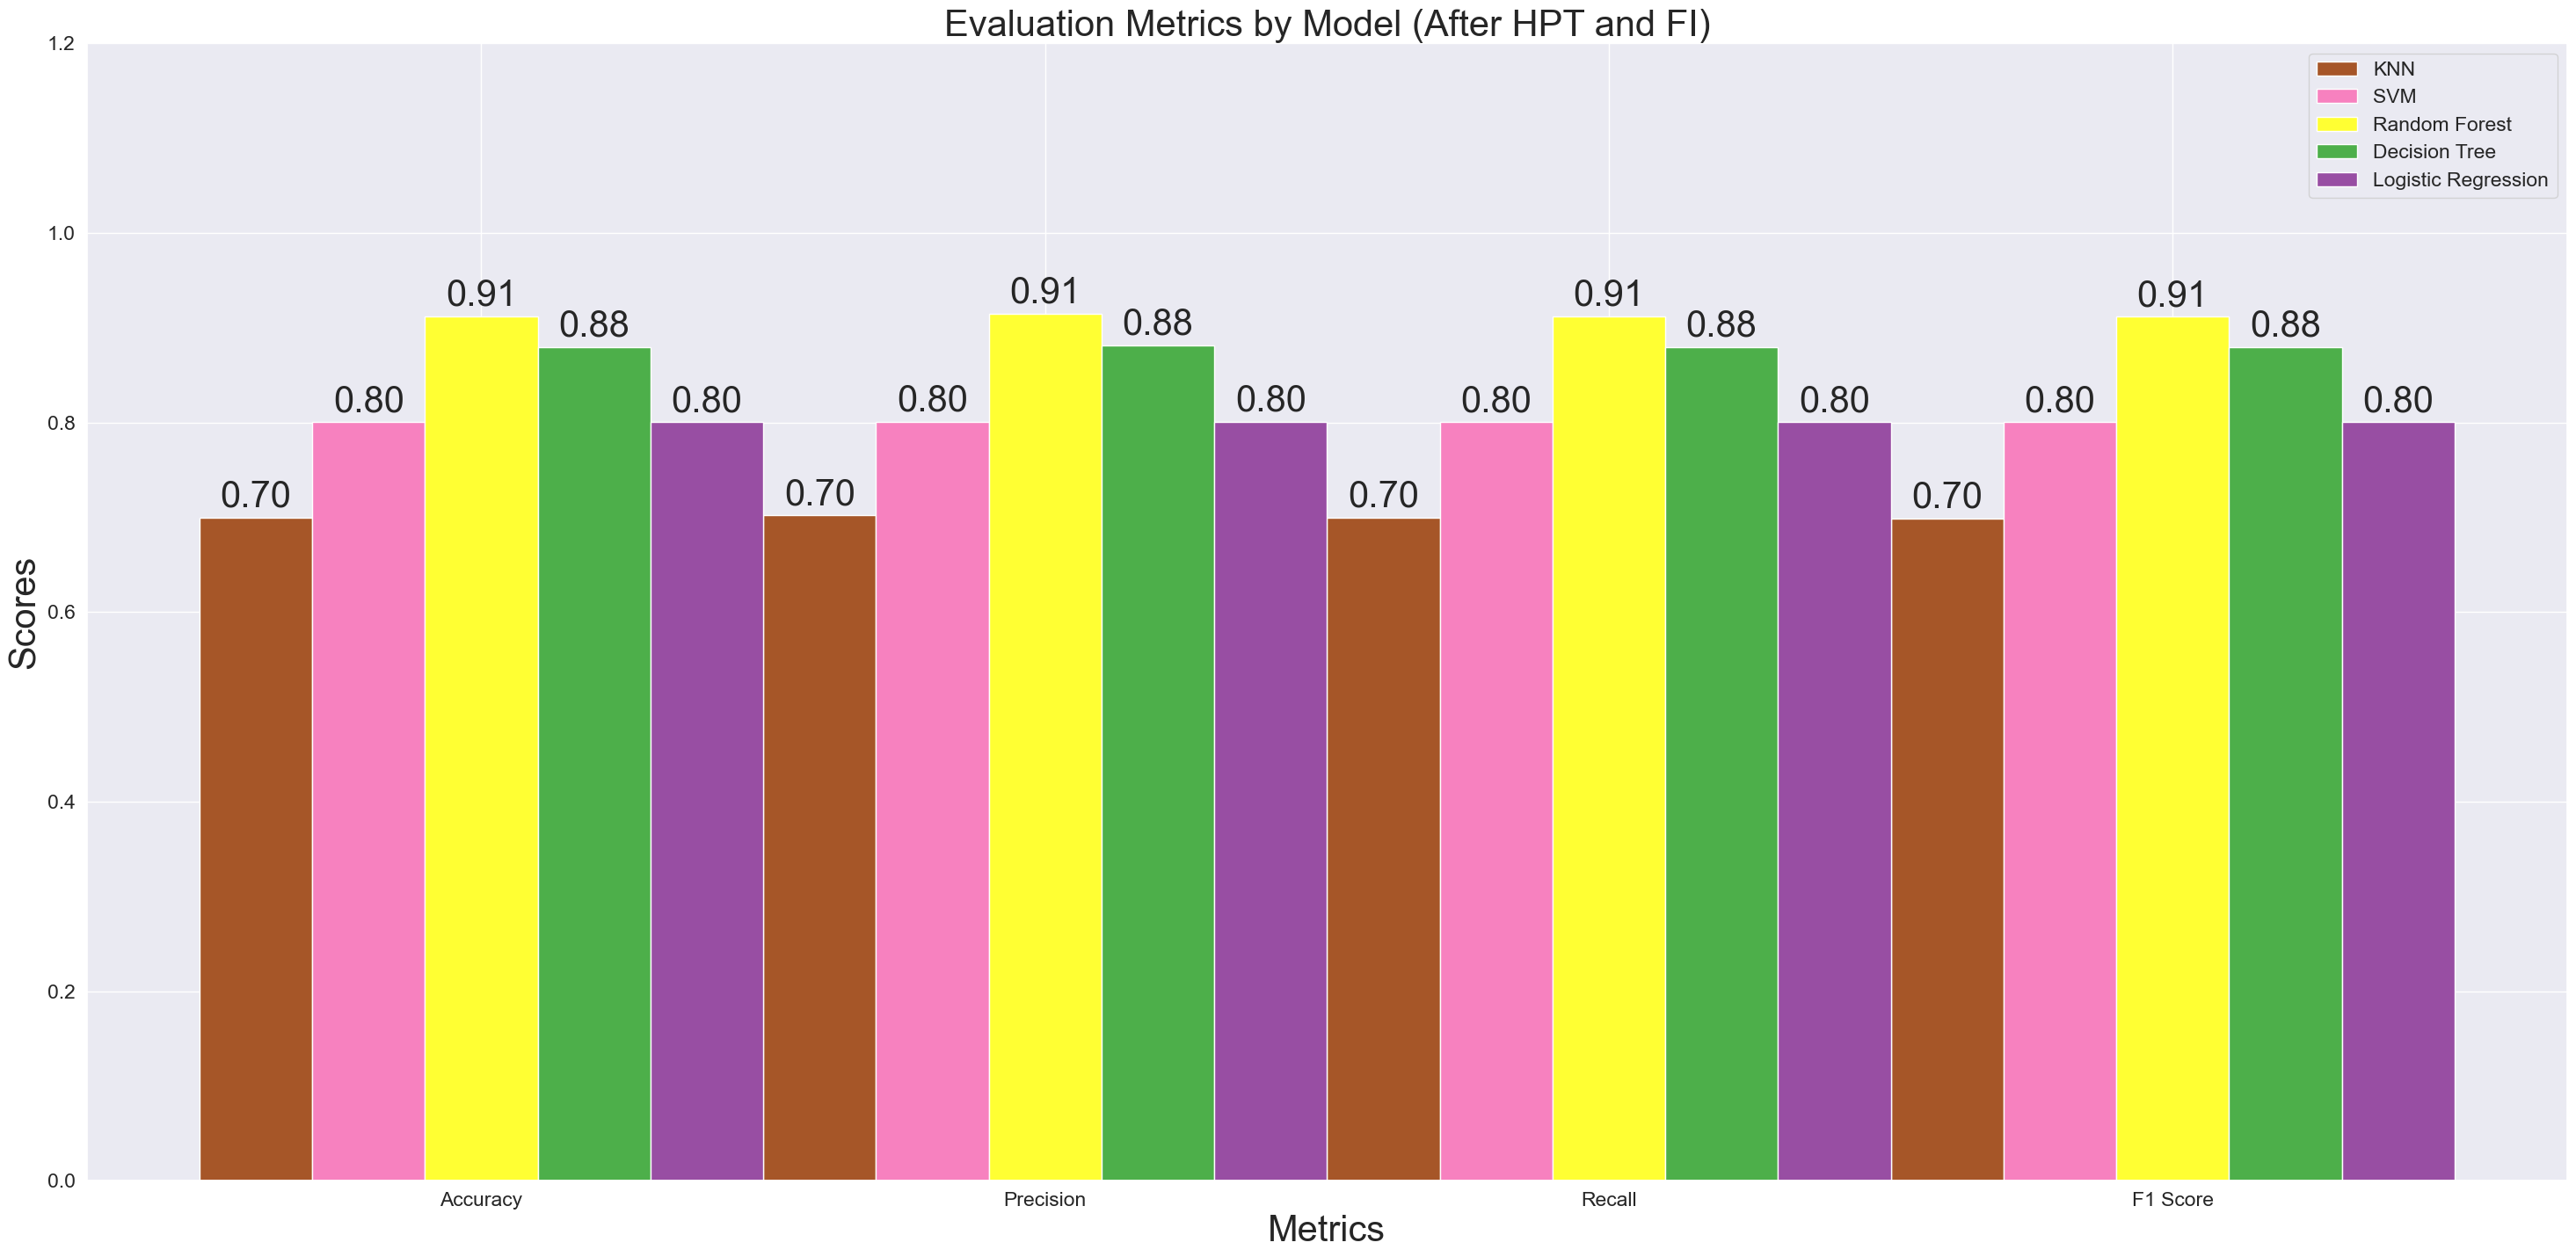

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Combine metrics for visualization
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
hy_knn_metrics = [hy_accuracy_knn, hy_precision_knn, hy_recall_knn, hy_f1_knn]
hy_svm_metrics = [hy_accuracy_svm, hy_precision_svm, hy_recall_svm, hy_f1_svm]
hy_rf_metrics = [hy_accuracy_rf, hy_precision_rf, hy_recall_rf, hy_f1_rf]
hy_dt_metrics = [hy_accuracy_dt, hy_precision_dt, hy_recall_dt, hy_f1_dt]
hy_lr_metrics = [hy_accuracy_lr, hy_precision_lr, hy_recall_lr, hy_f1_lr]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars # Adjusted width for better visualization

fig, ax = plt.subplots(figsize=(30, 15))

# Set vibrant colors for the bars
colors = ['#a65628', '#f781bf', '#ffff33', '#4daf4a', '#984ea3'] # Added more colors


# Use the correct metric variables here:
rects1 = ax.bar(x - 2 * width, hy_knn_metrics, width, label='KNN', color=colors[0])
rects2 = ax.bar(x - width, hy_svm_metrics, width, label='SVM', color=colors[1])
rects3 = ax.bar(x, hy_rf_metrics, width, label='Random Forest', color=colors[2])
rects4 = ax.bar(x + width, hy_dt_metrics, width, label='Decision Tree', color=colors[3])
rects5 = ax.bar(x + 2 * width, hy_lr_metrics, width, label='Logistic Regression', color=colors[4])

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.rcParams.update({'font.size': 30, 'font.weight': 'normal'})
ax.set_xlabel('Metrics', fontsize=30)
ax.set_ylabel('Scores', fontsize=30)
ax.set_title('Evaluation Metrics by Model (After HPT and FI)', fontsize=30) # Updated title
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.2)
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

# Save the plot as an image file
plt.savefig('evaluation_metrics_after_hpt_fi.png', bbox_inches='tight', facecolor='white', transparent=False) # Updated filename

# Show the plot
plt.show()

# Accuracy comparison

In [ ]:
bh = [round(accuracy_knn*100, 2), round(accuracy_svm*100, 2), round(accuracy_rf*100, 2), round(accuracy_dt*100, 2), round(accuracy_lr*100, 2)]
ah = [round(hy_accuracy_knn*100, 2), round(hy_accuracy_svm*100, 2), round(hy_accuracy_rf*100, 2), round(hy_accuracy_dt*100, 2), round(hy_accuracy_lr*100, 2)]

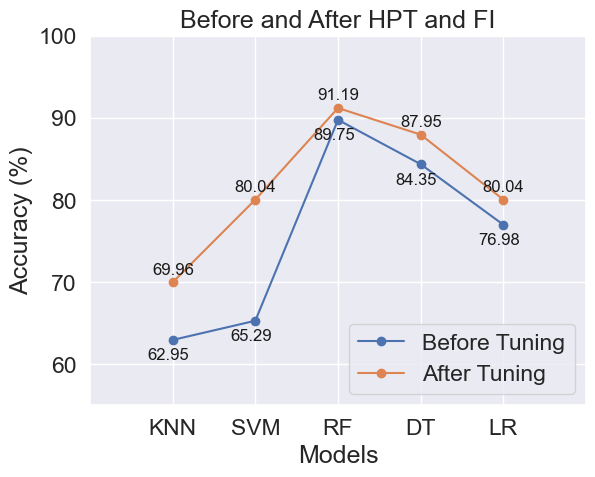

In [ ]:
plt.rcParams.update({'font.size': 18, 'font.weight': 'normal'})
x = np.array([1, 2, 3, 4, 5])

bars = ('KNN', 'SVM', 'RF', 'DT', 'LR')
x_pos = np.arange(len(bars))

plt.plot(x, bh, marker='o', linestyle='-', label = "Before Tuning", color = 'C0')
plt.plot(x, ah, marker='o', linestyle='-', label = "After Tuning", color = 'C1')

for i, txt in enumerate(bh):
    plt.annotate(txt, (x[i]-0.3, bh[i]-2.4), fontsize=12, color='k')

for i, txt in enumerate(ah):
    plt.annotate(txt, (x[i]-0.25, ah[i]+1), fontsize=12, color='k')

plt.legend()
plt.xlabel("Models")  # add X-axis label
plt.ylabel("Accuracy (%)")  # add Y-axis label
plt.xlim(0, 6)
plt.ylim(55, 100)
plt.xticks(x, bars)
plt.title('Before and After HPT and FI')
plt.savefig("HyperParameter Tuning accuracy.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

# Precision comparison

In [ ]:
bh = [round(precision_knn*100, 2), round(precision_svm*100, 2), round(precision_rf*100, 2), round(precision_dt*100, 2), round(precision_lr*100, 2)]
ah = [round(hy_precision_knn*100, 2), round(hy_precision_svm*100, 2), round(hy_precision_rf*100, 2), round(hy_precision_dt*100, 2), round(hy_precision_lr*100, 2)]

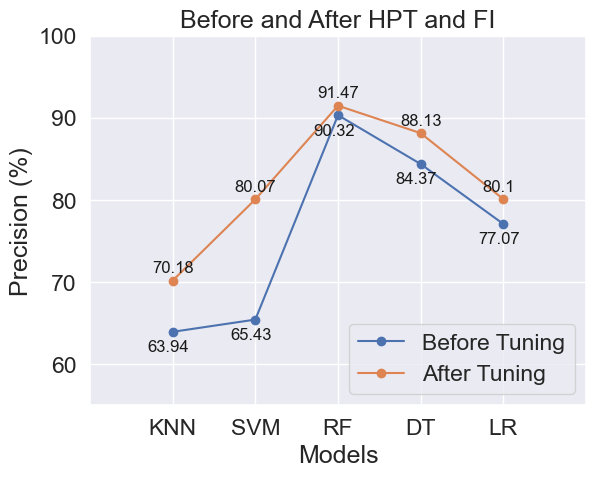

In [ ]:
plt.rcParams.update({'font.size': 18, 'font.weight': 'normal'})
x = np.array([1, 2, 3, 4, 5])

bars = ('KNN', 'SVM', 'RF', 'DT', 'LR')
x_pos = np.arange(len(bars))

plt.plot(x, bh, marker='o', linestyle='-', label = "Before Tuning", color = 'C0')
plt.plot(x, ah, marker='o', linestyle='-', label = "After Tuning", color = 'C1')

for i, txt in enumerate(bh):
    plt.annotate(txt, (x[i]-0.3, bh[i]-2.4), fontsize=12, color='k')

for i, txt in enumerate(ah):
    plt.annotate(txt, (x[i]-0.25, ah[i]+1), fontsize=12, color='k')

plt.legend()
plt.xlabel("Models")  # add X-axis label
plt.ylabel("Precision (%)")  # add Y-axis label
plt.xlim(0, 6)
plt.ylim(55, 100)
plt.xticks(x, bars)
plt.title('Before and After HPT and FI')
plt.savefig("HyperParameter Tuning precision.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

# Recall comparison

In [ ]:
bh = [round(recall_knn*100, 2), round(recall_svm*100, 2), round(recall_rf*100, 2), round(recall_dt*100, 2), round(recall_lr*100, 2)]
ah = [round(hy_recall_knn*100, 2), round(hy_recall_svm*100, 2), round(hy_recall_rf*100, 2), round(hy_recall_dt*100, 2), round(hy_recall_lr*100, 2)]

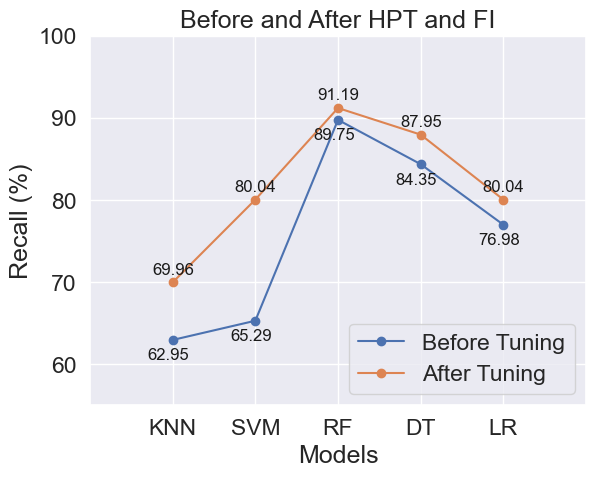

In [ ]:
plt.rcParams.update({'font.size': 18, 'font.weight': 'normal'})
x = np.array([1, 2, 3, 4, 5])

bars = ('KNN', 'SVM', 'RF', 'DT', 'LR')
x_pos = np.arange(len(bars))

plt.plot(x, bh, marker='o', linestyle='-', label = "Before Tuning", color = 'C0')
plt.plot(x, ah, marker='o', linestyle='-', label = "After Tuning", color = 'C1')

for i, txt in enumerate(bh):
    plt.annotate(txt, (x[i]-0.3, bh[i]-2.4), fontsize=12, color='k')

for i, txt in enumerate(ah):
    plt.annotate(txt, (x[i]-0.25, ah[i]+1), fontsize=12, color='k')

plt.legend()
plt.xlabel("Models")  # add X-axis label
plt.ylabel("Recall (%)")  # add Y-axis label
plt.xlim(0, 6)
plt.ylim(55, 100)
plt.xticks(x, bars)
plt.title('Before and After HPT and FI')
plt.savefig("HyperParameter Tuning recall.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

# F1_Score comparison

In [ ]:
bh = [round(f1_knn*100, 2), round(f1_svm*100, 2), round(f1_rf*100, 2), round(f1_dt*100, 2), round(f1_lr*100, 2)]
ah = [round(hy_f1_knn*100, 2), round(hy_f1_svm*100, 2), round(hy_f1_rf*100, 2), round(hy_f1_dt*100, 2), round(hy_f1_lr*100, 2)]

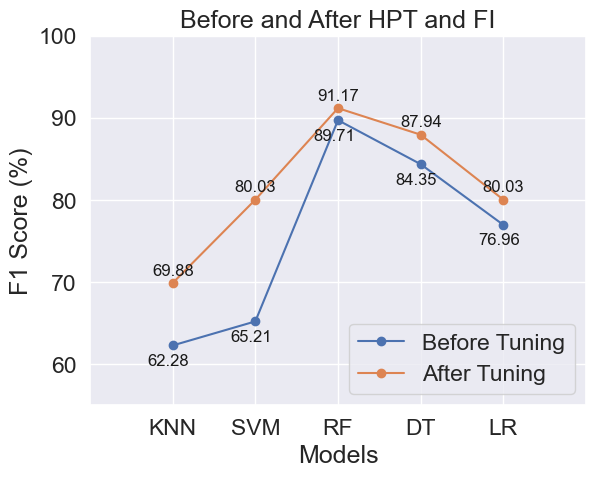

In [ ]:
plt.rcParams.update({'font.size': 18, 'font.weight': 'normal'})
x = np.array([1, 2, 3, 4, 5])

bars = ('KNN', 'SVM', 'RF', 'DT', 'LR')
x_pos = np.arange(len(bars))

plt.plot(x, bh, marker='o', linestyle='-', label = "Before Tuning", color = 'C0')
plt.plot(x, ah, marker='o', linestyle='-', label = "After Tuning", color = 'C1')

for i, txt in enumerate(bh):
    plt.annotate(txt, (x[i]-0.3, bh[i]-2.4), fontsize=12, color='k')

for i, txt in enumerate(ah):
    plt.annotate(txt, (x[i]-0.25, ah[i]+1), fontsize=12, color='k')

plt.legend()
plt.xlabel("Models")  # add X-axis label
plt.ylabel("F1 Score (%)")  # add Y-axis label
plt.xlim(0, 6)
plt.ylim(55, 100)
plt.xticks(x, bars)
plt.title('Before and After HPT and FI')
plt.savefig("HyperParameter Tuning f1.png", dpi = 300, bbox_inches="tight", facecolor='white', transparent=False)
plt.show()

<h1>ensemble</h1>

In [ ]:
rf = RandomForestClassifier(n_estimators=926, min_samples_split=2, min_samples_leaf=1, max_features='log2', max_depth=100, bootstrap=False)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=None, max_leaf_nodes=None, min_samples_leaf=12, min_samples_split=9, splitter='best')
lr = LogisticRegression(C=4.261558744912447, max_iter=200, penalty='l1', solver='liblinear')

In [ ]:
vc = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('dt', dt)], voting='hard')

In [ ]:
vc.fit(X_Train, Y_Train)
predictions = vc.predict(X_Test)

[[266  12]
 [ 40 238]]


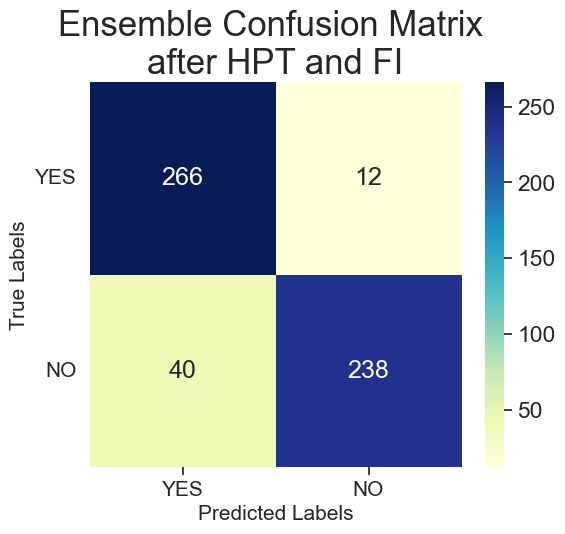

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Ensemble Confusion Matrix \nafter HPT and FI', fontsize=25)

#plt.savefig('KNN Depression Confusion Matrix.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
#Classification report
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.87      0.96      0.91       278
      YES(1)       0.95      0.86      0.90       278

    accuracy                           0.91       556
   macro avg       0.91      0.91      0.91       556
weighted avg       0.91      0.91      0.91       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
hy_accuracy_lr = accuracy_score(Y_Test, predictions)
hy_precision_lr = precision_score(Y_Test, predictions, average='macro')
hy_recall_lr = recall_score(Y_Test, predictions, average='macro')
hy_f1_lr = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.4f" %(hy_accuracy_lr*100))
print("Precision: %.4f" %(hy_precision_lr*100))
print("Recall: %.4f" %(hy_recall_lr*100))
print("F1-score: %.4f" %(hy_f1_lr*100))

Accuracy: 90.6475
Precision: 91.0641
Recall: 90.6475
F1-score: 90.6237


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64,128,512,128,64), max_iter=1000,activation = 'relu',solver='adam',random_state=1)

In [ ]:
print(mlp)

MLPClassifier(hidden_layer_sizes=(64, 128, 512, 128, 64), max_iter=1000,
              random_state=1)


In [ ]:
mlp.fit(X_Train, Y_Train)
predictions = mlp.predict(X_Test)

[[222  56]
 [ 42 236]]


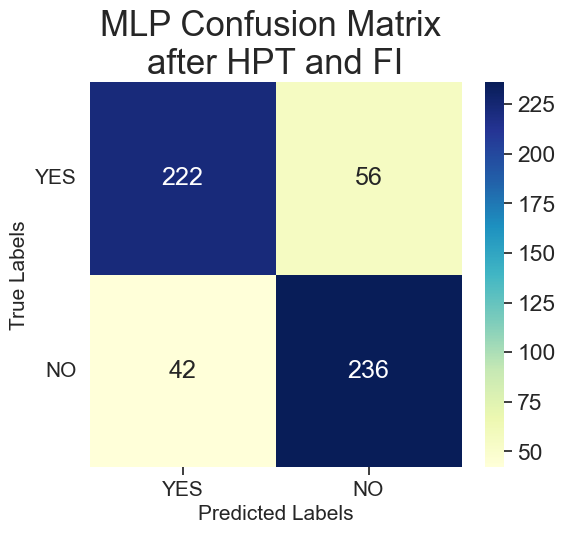

In [ ]:
#Confusion matrix
cm = confusion_matrix(Y_Test, predictions)
print(cm)

import seaborn as sns

#Setting the labels
labels = ['YES', 'NO']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(6, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap="YlGnBu")
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.set_ticklabels(labels, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=15)
ax.yaxis.set_ticklabels(labels, fontsize = 15)
plt.yticks(rotation=0)

plt.title('MLP Confusion Matrix \nafter HPT and FI', fontsize=25)

#plt.savefig('KNN Depression Confusion Matrix.png', facecolor='white', transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
print(classification_report(Y_Test, predictions, target_names = ['NO(0)', 'YES(1)']))

              precision    recall  f1-score   support

       NO(0)       0.84      0.80      0.82       278
      YES(1)       0.81      0.85      0.83       278

    accuracy                           0.82       556
   macro avg       0.82      0.82      0.82       556
weighted avg       0.82      0.82      0.82       556



In [ ]:
# Evaluate the model using accuracy, precision, recall, and F1-score
hy_accuracy_lr = accuracy_score(Y_Test, predictions)
hy_precision_lr = precision_score(Y_Test, predictions, average='macro')
hy_recall_lr = recall_score(Y_Test, predictions, average='macro')
hy_f1_lr = f1_score(Y_Test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.4f" %(hy_accuracy_lr*100))
print("Precision: %.4f" %(hy_precision_lr*100))
print("Recall: %.4f" %(hy_recall_lr*100))
print("F1-score: %.4f" %(hy_f1_lr*100))

Accuracy: 82.3741
Precision: 82.4564
Recall: 82.3741
F1-score: 82.3629


# The End, Thank YOU

#Web Application

In [ ]:
!pip install streamlit
!streamlit run app.py &

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
# Save the trained model
joblib.dump(rf_model, "alzheimers_model.pkl")

['alzheimers_model.pkl']

In [ ]:
# Load the trained model
model = joblib.load("alzheimers_model.pkl")

In [ ]:
# Set Page Configuration
st.set_page_config(page_title="Alzheimer's Diagnosis Report", layout="centered")


2025-02-12 15:50:04.499 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
# Custom CSS for Styling
st.markdown(
    """
    <style>
    .title { font-size:30px; font-weight: bold; text-align: center; color: #2E8B57; }
    .report-box { background-color: #f9f9f9; padding: 20px; border-radius: 10px; box-shadow: 0px 0px 10px #ccc; }
    .prediction { font-size: 20px; font-weight: bold; color: red; text-align: center; }
    .safe { color: green; }
    .warning { color: red; }
    table { width: 100%; border-collapse: collapse; }
    th, td { border: 1px solid #ddd; padding: 8px; text-align: left; }
    th { background-color: #f2f2f2; }
    </style>
    """,
    unsafe_allow_html=True
)

2025-02-12 15:50:34.045 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:50:34.368 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-12 15:50:34.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
# Title
st.markdown("<p class='title'>🧠 Alzheimer's Diagnosis Report</p>", unsafe_allow_html=True)

2025-02-12 15:51:11.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:51:11.742 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
# Show Current Date & Time
st.write(f"**📅 Report Generated On:** {datetime.now().strftime('%m/%d/%Y, %I:%M %p')}")

2025-02-12 15:51:32.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:51:32.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:51:32.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:51:32.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
# Input for Patient Name
patient_name = st.text_input("👤 Patient Name", "")

2025-02-12 15:51:48.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:51:48.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:51:48.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:51:48.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:51:48.442 Session state does not function when running a script without `streamlit run`
2025-02-12 15:51:48.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:51:48.449 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
# Feature Inputs (20 features)
features = []
for i in range(1, 21):
    feature_value = st.number_input(f'Feature {i}', min_value=0.0, format="%.2f")
    features.append(feature_value)

2025-02-12 15:52:10.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:52:10.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:52:10.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:52:10.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:52:10.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:52:10.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:52:10.614 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:52:10.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# Prediction Button
if st.button("🔍 Predict"):
    if patient_name.strip() == "":
        st.error("Please enter the patient's name.")
    else:
        # Prepare features for model
        input_features = np.array(features).reshape(1, -1)
        prediction = model.predict(input_features)

        # Display Patient Information Table
        st.markdown("<div class='report-box'>", unsafe_allow_html=True)
        st.subheader("📋 Patient Information")

        patient_data = {"Field": ["Name"] + [f"Feature {i}" for i in range(1, 21)],
                        "Value": [patient_name] + features}
        df = pd.DataFrame(patient_data)

        st.table(df)  # Displaying the table

        # Display Prediction Result
        st.subheader("🧪 Prediction Result")
        if prediction[0] == 0:
            st.markdown("<p class='prediction safe'>🟢 No Alzheimer's Detected</p>", unsafe_allow_html=True)
        else:
            st.markdown("<p class='prediction warning'>🔴 Alzheimer's Detected</p>", unsafe_allow_html=True)
            st.warning("⚠️ Please consult a doctor for further examination.")

        st.markdown("</div>", unsafe_allow_html=True)

2025-02-12 15:52:59.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:52:59.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:52:59.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:53:00.009 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 15:53:00.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
!pip install pyngrok
!ngrok authtoken YOUR_AUTHTOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# 1. Get your authtoken from ngrok.com/dashboard
# 2. Set your authtoken
ngrok.set_auth_token("YOUR_AUTHTOKEN")  # Replace with your actual authtoken

# 3. Now connect
public_url = ngrok.connect(port='8501')
print(f"🔗 Public URL: {public_url}")

ERROR:pyngrok.process.ngrok:t=2025-02-12T15:58:02+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: YOUR_AUTHTOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-12T15:58:02+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: YOUR_AUTHTOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: YOUR_AUTHTOKEN\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n.